# Figures from "Spatially organized multicellular immune hubs in human colorectal cancer"
## Code for key pannels included in Figure 3

In [1]:
code = '../code/';
codeExternal =  '../external';
data = '../data/';


In [ ]:
run([code 'util/run_set_figure_defaults.m']);

% Other options (e.g. svg or eps) are possible:
outSuf = { '-dpng' } 
outDirPlot = { '../results/figures/' };


zColSet = 

  struct with fields:

           rainbow14: {1x14 cell}
           rainbow15: {1x15 cell}
           rainbow18: {1x18 cell}
           rainbow21: {1x21 cell}
        crcTypeColor: {'#0072B2'  '#B2DF8A'  '#E41A1C'  '#FB9A99'}
            crcTypeC: {'#E41A1C'  '#0072B2'  '#B2DF8A'}
    crcTypeColorName: {'MSS'  'Normal'  'MSI_MLH1Meth'  'MSI_MLH1NoMeth'}


zColSet = 

  struct with fields:

           rainbow14: {1x14 cell}
           rainbow15: {1x15 cell}
           rainbow18: {1x18 cell}
           rainbow21: {1x21 cell}
        crcTypeColor: {'#0072B2'  '#B2DF8A'  '#E41A1C'  '#FB9A99'}
            crcTypeC: {'#E41A1C'  '#0072B2'  '#B2DF8A'}
    crcTypeColorName: {'MMRP'  'Normal'  'MMRd'  'MMRd_MLH1NoMeth'}



In [ ]:
addpath(genpath(code))

In [ ]:
addpath(genpath(codeExternal))

## Loading main data object

In [ ]:

colon10x_default = readDataRobj([ data 'colon10x_default/' ])

## Loading tSNE coordinate files

In [ ]:


[zFile,~,zFname] = fileList([ data 'cNMF_tSNE/*.gz']);

zFname = regexprep(zFname,'.tsv.gz','');
zFname = regexprep(zFname,'crc295v4_cNMF_tSNE_','');
zFname = regexprep(zFname,'allImm','Imm');
zFname{end} = 'global';

for zi = 1:length(zFname)
   [zRaw,~,zH] = fastMatRead(zFile{zi});    
   tSNE_coord.(zFname{zi}).sampleID = zH;
   tSNE_coord.(zFname{zi}).ydata = zRaw;
end

tSNE_coord

## Load ccNMF summary file

In [ ]:
ccNMFexpAlt = load([ data 'matlab/crc10x_c295v4_basic_ccNMFv6_reExp_qN_subSet.mat'])

zSubG = ismember(ccNMFexpAlt.ensgID,colon10x_default.ensgID);
ccNMFexpAlt = structSubSelectMat(ccNMFexpAlt,zSubG);
assert(isequal(ccNMFexpAlt.ensgID,colon10x_default.ensgID));

In [ ]:
zMergeT = struct2table(groupTable(colon10x_default.metatable,'PatientTypeID'));

colon10x_default.metatable.MMRStatusTumor = colon10x_default.metatable.MMRStatus;
colon10x_default.metatable.MMRStatusTumor = regexprep(colon10x_default.metatable.MMRStatusTumor,'NA','Normal');

zBID = mergeStringPair(colon10x_default.metatable.MMRStatusTumor,colon10x_default.metatable.PatientTypeID);

In [53]:
zOutP = 'Figure_3'
run run_set_figure_defaults



zOutP =

    'Figure_3'



### MMR by cell-types and MMR status


zopts =

     []

Saving plot: ../results/figures//Figure_3/Fig3a_tSNE_Strom_MMR.png.-dpng


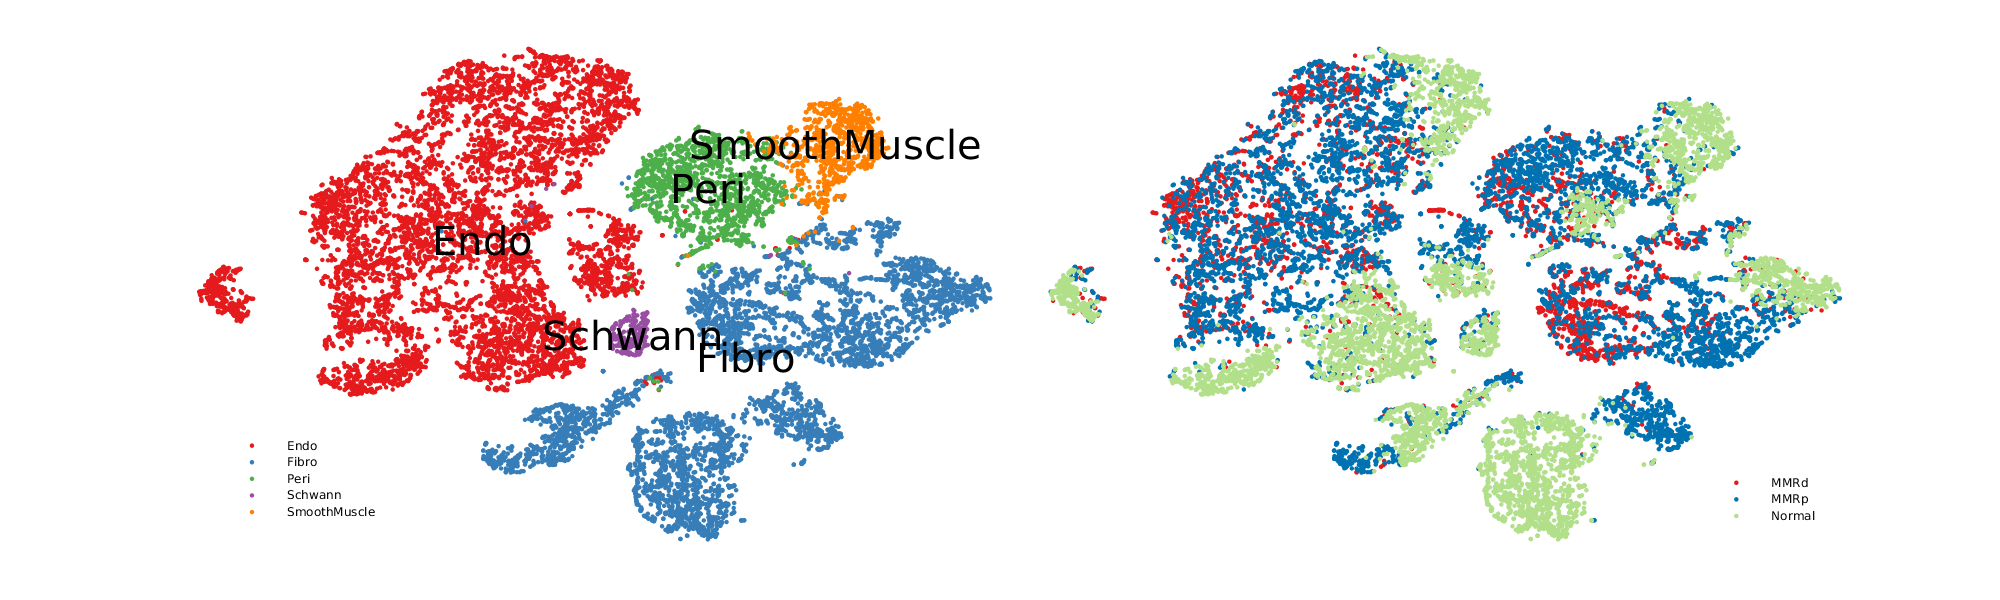

In [54]:
%plot -s 2000,600

zcf = 'Strom';
[zia,zib] = comember(colon10x_default.sampleID,tSNE_coord.(zcf).sampleID);

zYdata = tSNE_coord.(zcf).ydata(zib,:);

zfig = figure('Position',[0 0 2000 600]);

subplot1(1,2);

zopts = []
zopts.newPlot = [];
zopts.pSize = 10;
zopts.doAlpha = 0.7;
zopts.doPosTxt = 1;

zCl = colon10x_default.annot.clMidway(zia);
zCmap = brewermap(luniq(zCl),'Set1');

subplot1(1)
plot_tsne_scatter(zYdata,zCl,zCmap,[],zopts);

axis off 
axis tight


zCmap = colorSet(zColSet.crcTypeC);
zopts.doPosTxt = 0;

subplot1(2)
plot_tsne_scatter(zYdata,colon10x_default.metatable.MMRStatusTumor(zia),zCmap,[],zopts);

axis off 
axis tight
% legend off

%% 

zOutPlot = sprintf('%s/Fig3a_tSNE_%s_MMR',zOutP,zcf);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)

### heatmap comparing imune composition

Done - return
Done - return
    Value    Filter    Orig.    Percent
        B         0    25677      0.00%
      Epi         0    168672      0.00%
     Mast         0     3872      0.00%
  Myeloid         0    42545      0.00%
   Plasma         0    37813      0.00%
    Strom     15457    15457    100.00%
   TNKILC         0    77187      0.00%
---------
   Total:     15457    371223      4.16%

ans =

       15311


zopts = 

  struct with fields:

       fontSize: 12
         pdistX: 'Euc'
         pdistY: 'Spe'
    pseudoCount: 0
       linkageX: 'ward'
       linkageY: 'average'
        showTxt: 0
         annotX: [1x1 struct]


zopts = 

  struct with fields:

              fontSize: 12
                pdistX: 'Euc'
                pdistY: 'Spe'
           pseudoCount: 0
              linkageX: 'ward'
              linkageY: 'average'
               showTxt: 0
                annotX: [1x1 struct]
             colorHard: [-10 10]
                 extPR: [33x94 double]
           

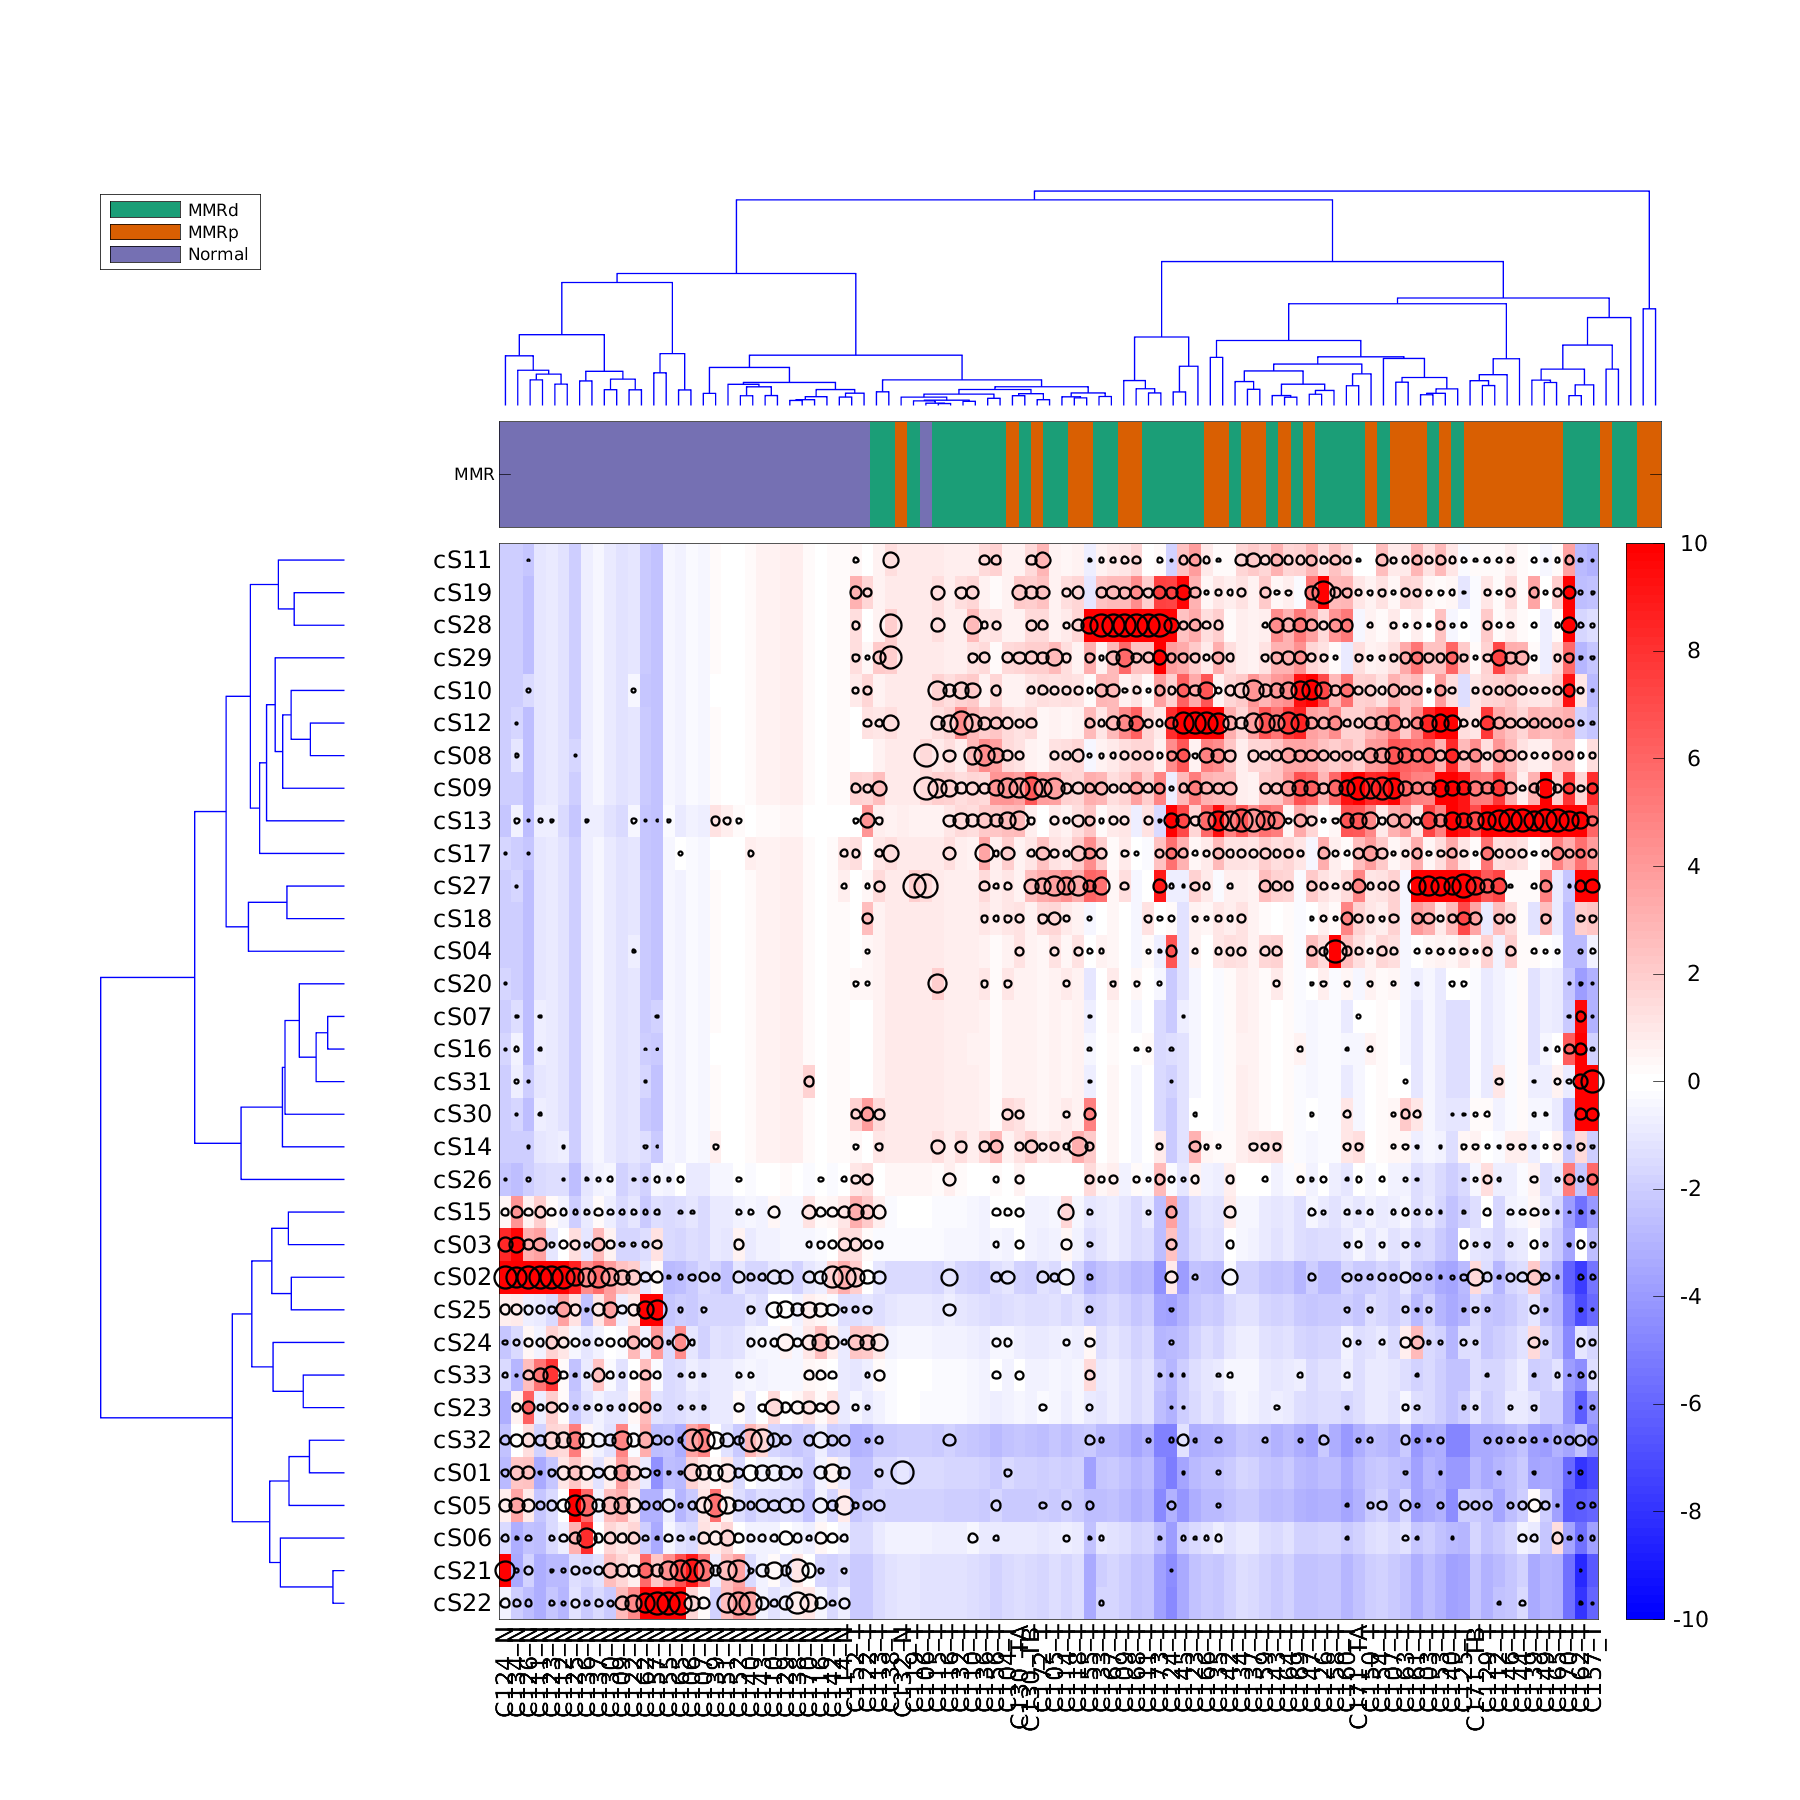

In [59]:
%plot -s 1800,1800

zGroupT = groupTable(colon10x_default.metatable,'PatientTypeID');

zBsmp = colon10x_default.metatable.PatientTypeID;
[zB,~,~,zCnt] = fastUnique(zBsmp);
zIsOver1K = ismember(zBsmp,zB(zCnt>1000));

%%
zSel = zIsOver1K & strgrep(cellstr(colon10x_default.annot.clTopLevel),'Strom',1);    
sum(zSel)


%% Comp vs normal 

zClust = regexprep(colon10x_default.annot.clFull(zSel),' .*','');
zPid = zBsmp(zSel);


zCC = crossTabTable(zClust,zPid,0,3);
% zSelN = strgrep(zCC.Properties.VariableNames,'N_'); !!
zSelN = strgrep(zCC.Properties.VariableNames,'_N');
zCCmat = table2array(zCC)+5; 


zCCnormal = zCCmat(:,zSelN);
zCCnormal = zCCnormal./sum(zCCnormal);


zCCnormal = median(zCCnormal,2);
zCCnormal = zCCnormal./sum(zCCnormal);


zCCexp = zCCnormal*sum(zCCmat);
zCCpr = (zCCmat - zCCexp)./sqrt(zCCexp);


zCCfreq = table2array(zCC);
zCCfreq = zCCfreq./sum(zCCfreq);

%% 

zLim = [ 0.05 0.1 0.15 0.2 0.25 ];

zCCcount = arrayfun(@(x)zCCfreq > x,zLim,'unif',0);


zCCfreqM = zCCfreq;
% zCCfreqM = max(zCCfreq,0.01);
zCCfreqM = min(zCCfreqM,0.3);

%%

zCCalt = array2table(zCCfreqM);
zCCalt.Properties.VariableNames = zCC.Properties.VariableNames;
zCCalt.Properties.RowNames = zCC.Properties.RowNames;

%% 

zopts = [];
zopts.fontSize = 12;
zopts.pdistX = 'Euc';
zopts.pdistY = 'Spe';
zopts.pseudoCount = 0;
zopts.linkageX = 'ward';
zopts.linkageY = 'average';
zopts.showTxt = 0;

zopts.annotX.sampleID =  zGroupT.PatientTypeID
zopts.annotX.MMR = zGroupT.MMRStatusTumor;
zopts.colorHard = [ -10 10 ];

zopts.extPR = zCCpr;%(zordT,zCellOrder);

zopts.colormap = redblue(128);
zopts.doDotPlot = 1;
zopts.dotPlotFactor = 300;
zopts.dotPlotColor = [0 0 0];
zopts.XTickLabelRotation = 90


% [zfig,zOutTable,zOrdX,zOrdY] = plot_crosstab_heatmap_alt([],[],[],zCCalt(zordT,zCellOrder),zopts);
[zfig,zOutTable,zOrdX,zOrdY] = plot_crosstab_heatmap_alt([],[],[],zCCalt,zopts);

%%
% TODO -- add legend
% delete(zfig.Children(6:7))
% Legend
% 
% zxval = [ 0.01 0.05 0.1 0.15 0.2 0.25 0.3 ]
% zxv = zxval*zopts.dotPlotFactor;
% zn =length(zxv);
% zxy = 1:zn
% zxx = ones(1,zn);
% 
% hold on;
% zax = subplot('Position',[0.15 0.85 0.15 0.5])
% zaxp = scatter(zxx,zxy,zxv)
% %
% ylim([ 0 zn*3])
% xlim([ 0.75 1.25])
% 
% %
% zaxp.CData = [ 0 0 0];
% zaxp.LineWidth = 1
% 
% %
% zvtxt = arrayfun(@(x)sprintf('%g',x),zxval,'unif',0);
% zvtxt{end} = [ '>' zvtxt{end} ]
% 
% %
% text(zxx+0.1,zxy,zvtxt,'fontsize',14)
% axis off

%% 

zOutPlot = sprintf('%s/StromCellComp_enrichment_HC_dot',zOutP);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)

 

## Figure 3B Immune composition 

Done - return

ans =

    0.1148    0.1382    0.1410

Done - return

zHfreq =

  33x3 table

                                     Normal         MMRp          MMRd   
                                   __________    __________    __________

    cS01_EndoArterial                 0.11215     0.0032816    0.00039414
    cS02_EndoCapillary                0.14098      0.029212      0.033093
    cS03_EndoCapillary               0.031526     0.0090898      0.010628
    cS04_Endo                      0.00014025      0.020003      0.021994
    cS05_EndoVenous                   0.10452      0.014481       0.01218
    cS06_EndoLymphatic               0.047879     0.0036146     0.0074214
    cS07_EndoCapillary_like        0.00041992     0.0025404     0.0001368
    cS08_EndoArterial_like         0.00030973      0.063876      0.058606
    cS09_Endo                               0       0.11678       0.10305
    cS10_EndoTipCells              0.00050808       0.04919      0.070373
    cS11_EndoProif

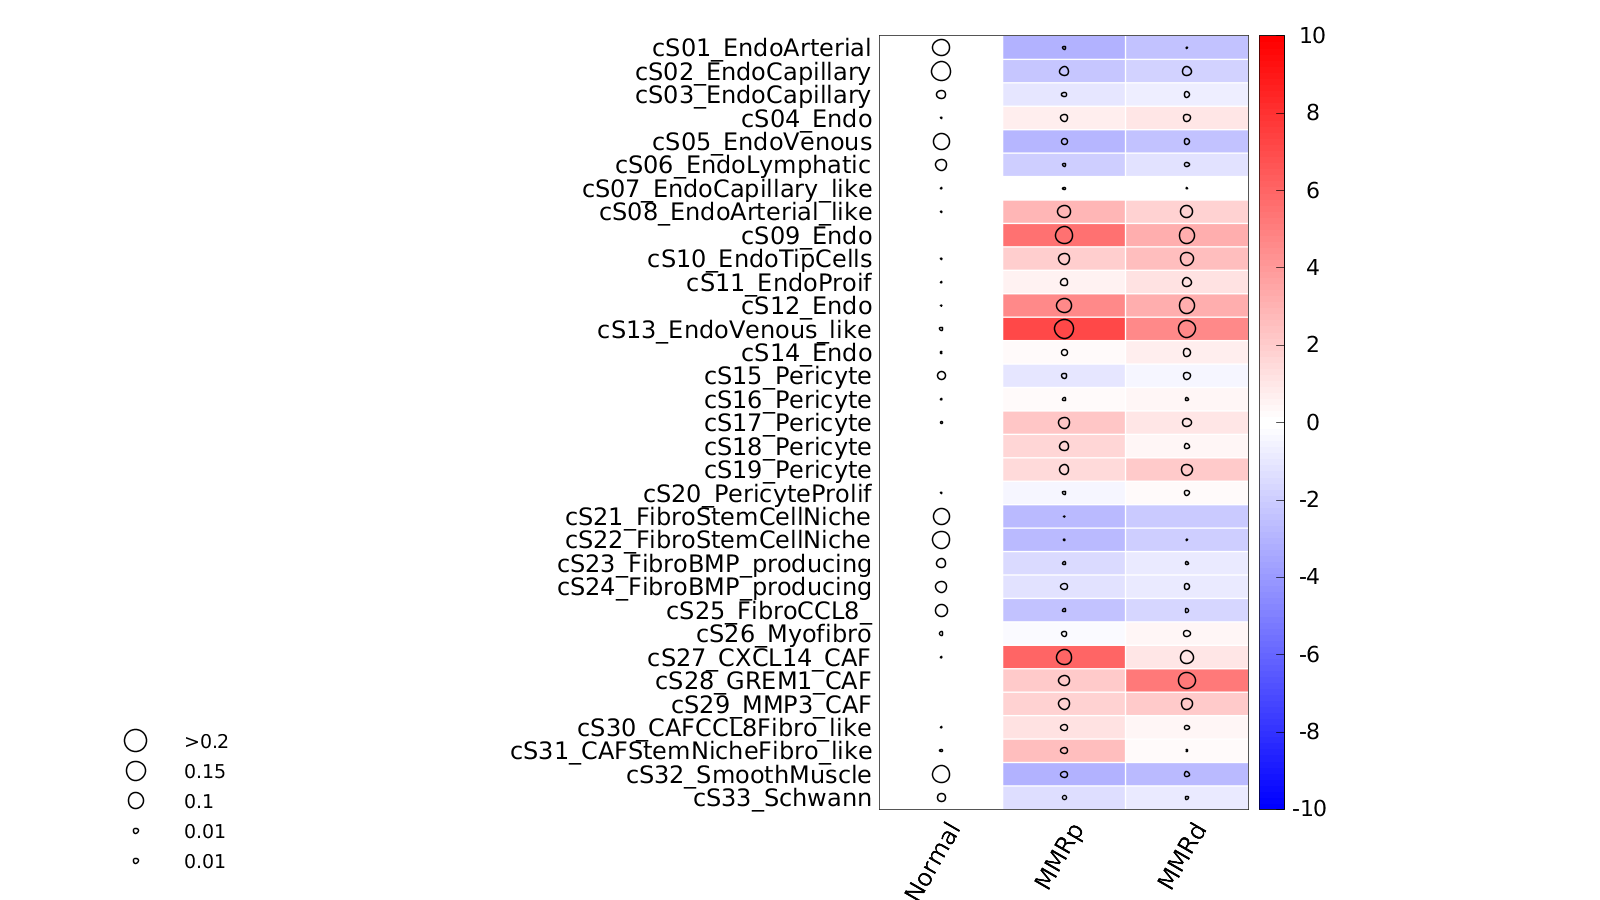

In [66]:
% zClust = regexprep(colon10x_default.annot.clFull(zSel),' .*','');
zClust = colon10x_default.annot.clFull(zSel);
zPid = zBsmp(zSel);

zCC = crossTabTable(zClust,zPid,0,3);
zSelN = strgrep(zCC.Properties.VariableNames,'_N');
zCC.Properties.RowNames;
zCCmat = table2array(zCC)+5; 

zCCnormal = zCCmat(:,zSelN);
zCCnormal = zCCnormal./sum(zCCnormal);

zCCnormal = median(zCCnormal,2);
zCCnormal = zCCnormal./sum(zCCnormal);

zCCexp = zCCnormal*sum(zCCmat);
zCCpr = (zCCmat - zCCexp)./sqrt(zCCexp);


zCCfreq = table2array(zCC);
zCCfreq = zCCfreq./sum(zCCfreq);


zCCfreqM = zCCfreq;

zCCalt = array2table(zCCfreqM);
zCCalt.Properties.VariableNames = zCC.Properties.VariableNames;
zCCalt.Properties.RowNames = zCC.Properties.RowNames;


mmrMap = containers.Map(zGroupT.PatientTypeID,zGroupT.MMRStatusTumor);

%

zType = nanvalues(mmrMap,zCC.Properties.VariableNames);

%% 



zopts = [];
% zopts.aggrFunc = @(X,dim)quantile(X,0.5,dim);
zopts.aggrFunc = @(X,dim)mean(X,dim);
[zHfreq,~,zTypeN] = summarize_group(zCCfreq,zType,zopts);
max(zHfreq)

zopts = [];
zopts.aggrFunc = @(X,dim)mean(X,dim);
[zHpr,~,zTypeNpr] = summarize_group(zCCpr,zType,zopts);



zord = [ 3 2 1 ];

zTypeN = zTypeN(zord);

zHfreq = array2table(zHfreq(:,zord),'VariableNames',zTypeN);
% zHpr = array2table(zHpr(:,zord),'VariableNames',zTypeN);
zHpr = zHpr(:,zord);
zHpr(:,1) = 0; % Zero normal
zHfreq.Properties.RowNames = regexprep(zCC.Properties.RowNames,'_$','')
% zHpr.Properties.RowNames = zCC.Properties.RowNames;

%%
% [~,zia,zib] = intersect(zSelImmAll,zCC.Properties.RowNames)
% zordT = zib(argsort(zia));
%% 

zopts = [];
zopts.fontSize = 12;
zopts.pdistX = 'Euc';
zopts.pdistY = 'Spe';
zopts.pseudoCount = 0;
zopts.linkageX = 'ward';
zopts.linkageY = 'average';
zopts.showTxt = 0;

zopts.doSortX = 0;
zopts.doSortY = 0;
zopts.doLeafOptimalOrderX = 0;
zopts.doLeafOptimalOrderY = 0;

% zopts.annotX.sampleID =  zGroupT.PatientTypeID
% zopts.annotX.MMR = zGroupT.MMRStatusTumor;
zopts.colorHard = [ -10 10 ];

% zopts.extPR = zHpr(zordT,:);
 zopts.extPR = zHpr;

zopts.colormap = redblue(128);
zopts.doDotPlot = 1;
zopts.dotPlotFactor = 1000;
zopts.dotPlotColor = [0 0 0];
zopts.gridLines = '-';

% [zfig,zOutTable,zOrdX,zOrdY] = plot_crosstab_heatmap_alt([],[],[],zHfreq(zordT,:),zopts);
[zfig,zOutTable,zOrdX,zOrdY] = plot_crosstab_heatmap_alt([],[],[],zHfreq,zopts);

%% 

delete(zfig.Children(3:5))
zfig.Position = [200 10 500 1700];

zfig.Children(2).Position(1) = 0.55;
zfig.Children(2).Position(2) = 0.1
zfig.Children(2).Position(3) = 0.23;
zfig.Children(2).Position(4) = 0.86

for zk = 2:length(zfig.Children(2).Children)-1
    zfig.Children(2).Children(zk).Color = [1 1 1];
end

%% Legend

zxval = [ 0.01 0.01 0.1 0.15 0.2  ];
zxv = zxval*zopts.dotPlotFactor;
zn =length(zxv);
zxy = 1:zn;
zxx = ones(1,zn);

hold on;
zax = subplot('Position',[0.01 0.01 0.15 0.5]);
zaxp = scatter(zxx,zxy,zxv);
%
ylim([ 0 zn*3]);
xlim([ 0.75 1.25]);

%
zaxp.CData = [ 0 0 0];
zaxp.LineWidth = 1;

%
zvtxt = arrayfun(@(x)sprintf('%g',x),zxval,'unif',0);
zvtxt{end} = [ '>' zvtxt{end} ];

%
text(zxx+0.1,zxy,zvtxt,'fontsize',14)
axis off

%% 

zOutPlot = sprintf('%s/Fig3b_StromCellComp_enrichment_mean_dot',zOutP);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)

##  Figure 3 C 

               newPlot: 1
                maxRow: 20
                widthV: 0.6000
                 dodge: 0.6200
              doJitter: 0
                  ylim: []
              plotSize: [1 1 1600 900]
               reorder: 0
              reorderX: 0
                  cmap: [3x3 double]
           reorderXbyY: 0
                 title: []
             groupMode: 1
            dropLegend: 0
                yLabel: []
                xLabel: []
                  font: 'Ariel'
              fontSize: 16
    XTickLabelRotation: []
              errorBar: []
              flipCoor: 0
               drawFig: 1
                ylabel: 'Fraction within stromal cells'
                xlabel: ''

Done - return
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1

ans = 

  Figure (1) with properties:

      Number: 1
        Name: ''
       Color: [1 1 1]
    Position: [1 

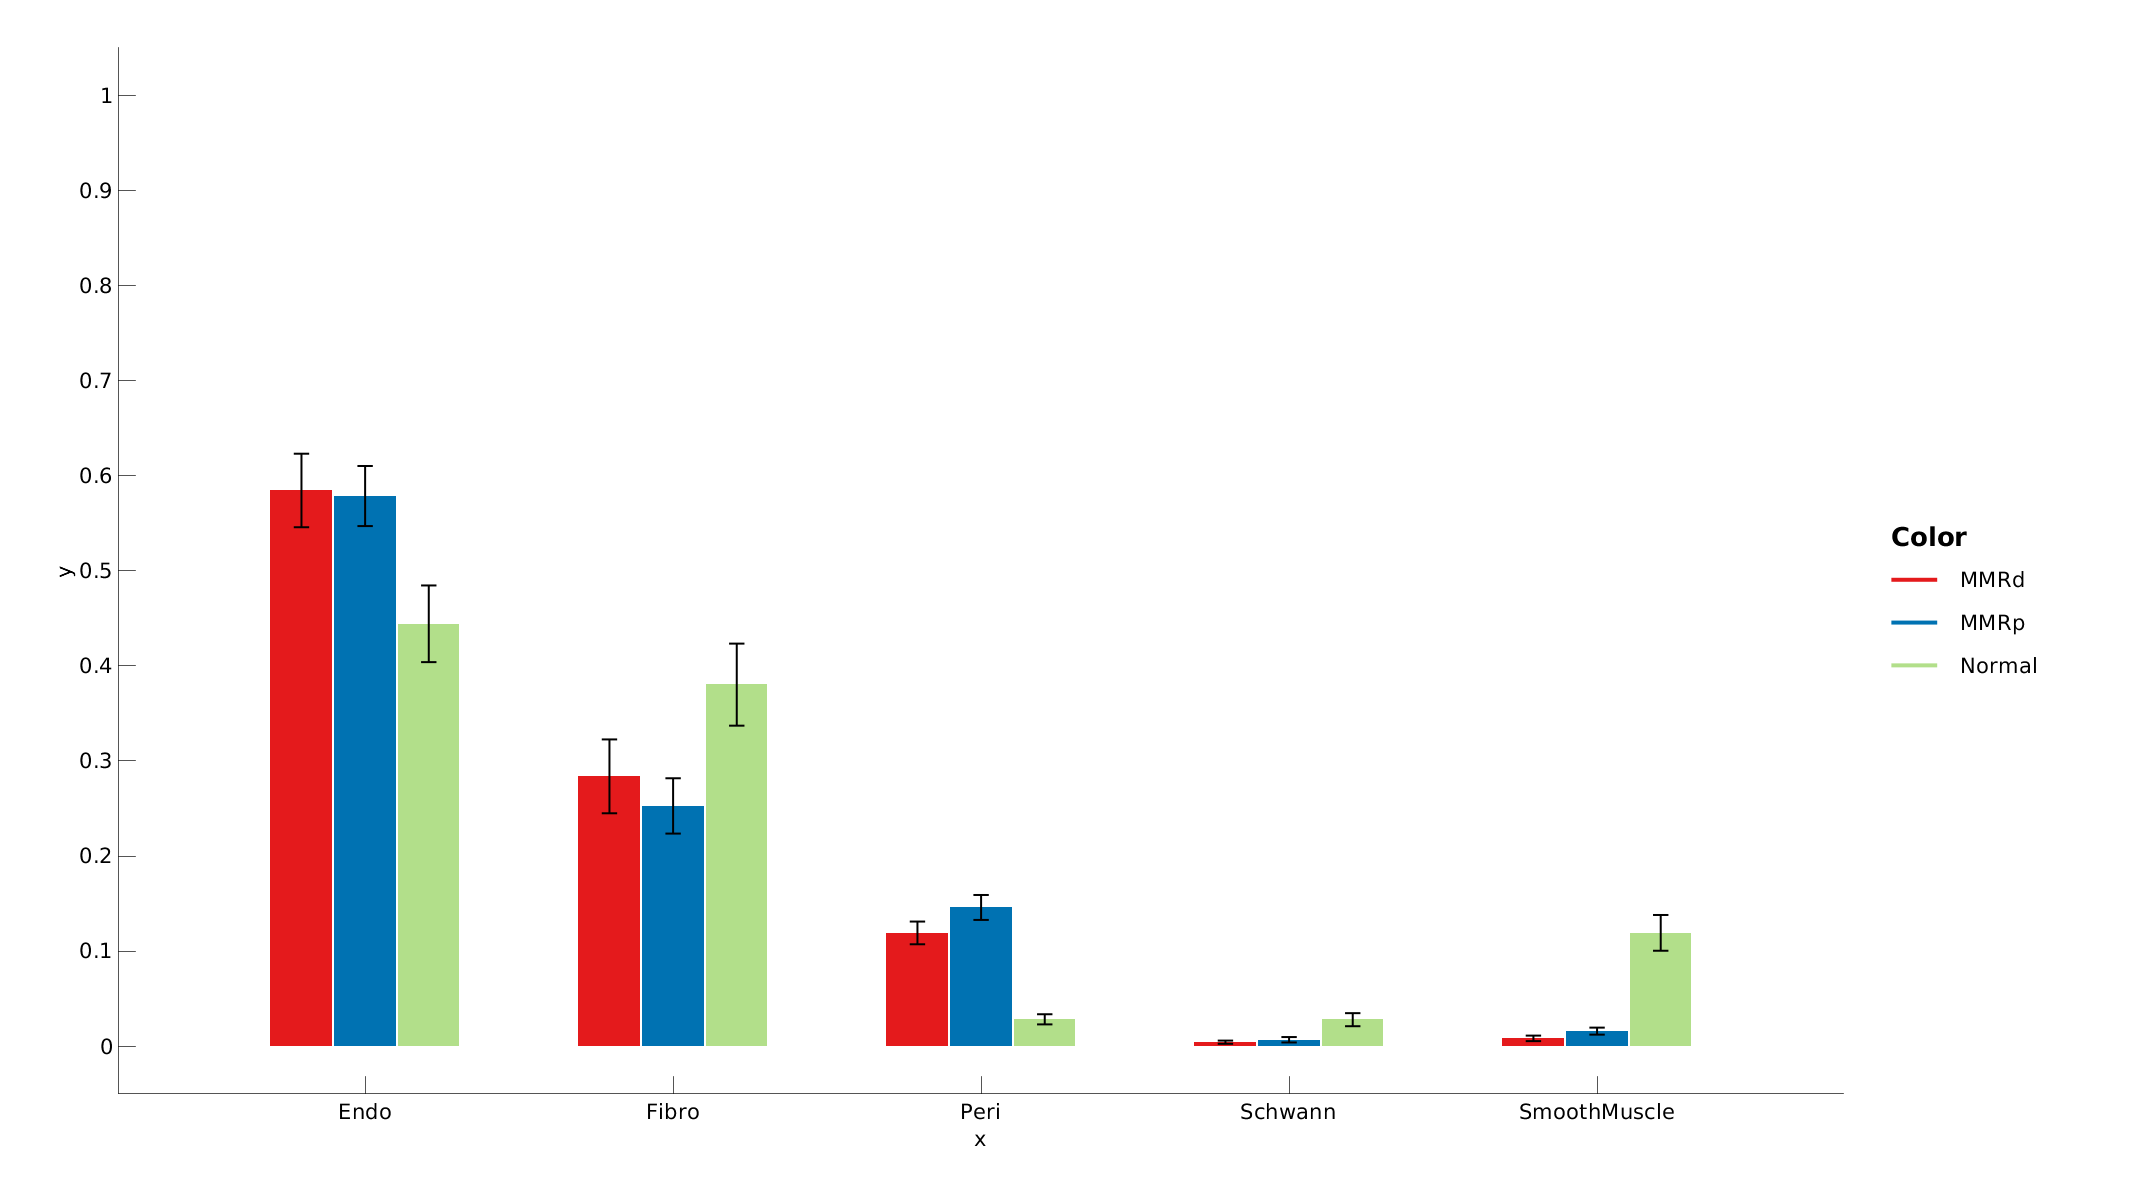

In [64]:
%plot -s 1600,900
zBID = mergeStringPair(colon10x_default.metatable.MMRStatusTumor,colon10x_default.metatable.PatientTypeID);
zClust = colon10x_default.annot.clMidway(zSel);

zCC = crossTabTable(zClust,zBID(zSel),1,3);
zSelN = strgrep(zCC.Properties.VariableNames,'_N');

%% 

zX = zCC.Properties.RowNames;
zY = table2array(zCC);
zF = regexprep(zCC.Properties.VariableNames,'_.*','');

zopts = [];
zopts.cmap = colorSet(zColSet.crcTypeC);
zopts.ylabel = 'Fraction within stromal cells';
zopts.xlabel = '';
zopts.dodge = 0.62;

plot_bar_simple(zX,zY,zF,zopts)

%%

zfig = gcf()
zOutPlot = sprintf('%s/Fig3c_StromCellComp_bar',zOutP);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)

### Figure 3D -- TODO Endothelial Violin

### Figure 3F Peri Violin

### All stromal program comp


zWnames =

  25x1 cell array

    {'pS01 (Smooth Muscle)'        }
    {'pS02 (Fibro stem cell niche)'}
    {'pS03 (ACTA2)'                }
    {'pS04'                        }
    {'pS05 (ISGs)'                 }
    {'pS06'                        }
    {'pS07'                        }
    {'pS08 (Collagens)'            }
    {'pS09'                        }
    {'pS10 (Tumor endo)'           }
    {'pS11 (Fibro CCL8)'           }
    {'pS12 (prolif)'               }
    {'pS13 (inflammatory)'         }
    {'pS14'                        }
    {'pS15 (Perictye)'             }
    {'pS16 (Metallothionein)'      }
    {'pS17 (Fibro BMP-producing)'  }
    {'pS18 (Endo art)'             }
    {'pS19 (Endo cap)'             }
    {'pS20'                        }
    {'pS21 (Fos, Jun)'             }
    {'pS22 (Schwann)'              }
    {'pS23 (Endo lymph)'           }
    {'pS24 (Endo ven)'             }
    {'pS25'                        }

Done - return

zNtype =

  99x1 cell array


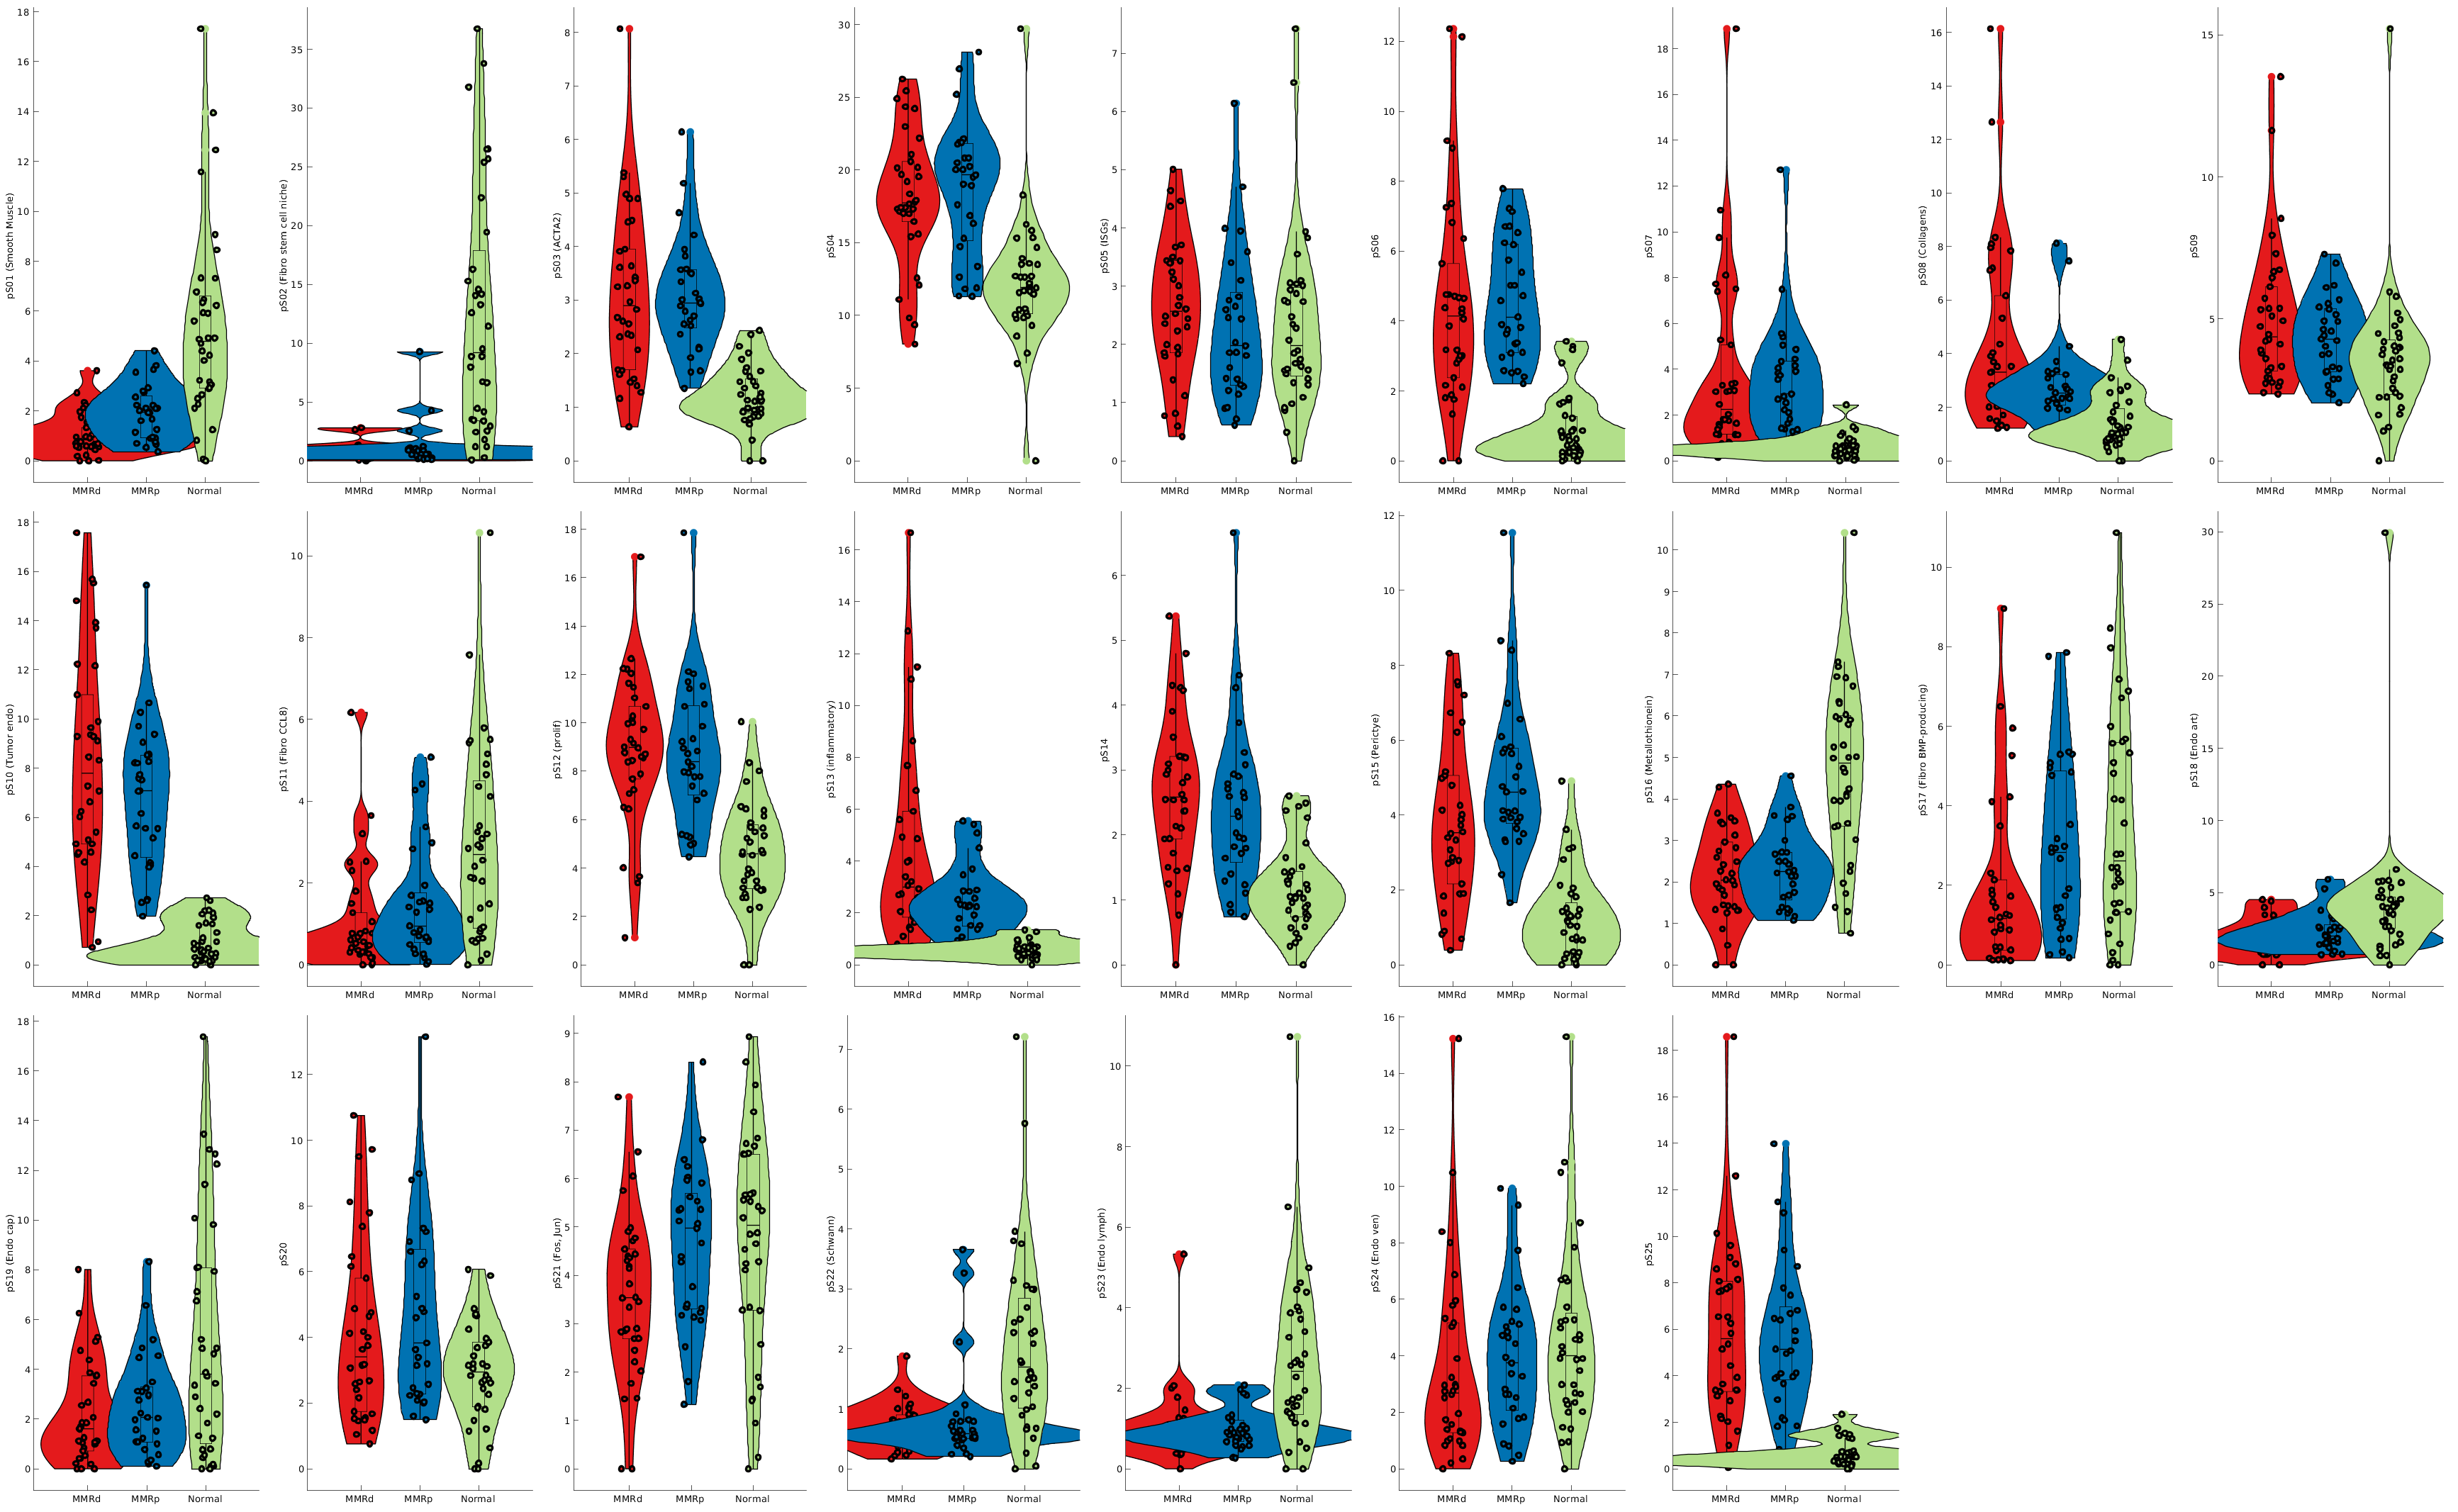

In [67]:
%plot -s 2600,1600
zcf = 'Strom';
[zia,zib] = comember(colon10x_default.sampleID,tSNE_coord.(zcf).sampleID);

zYdata = tSNE_coord.(zcf).ydata(zib,:);
zCl = colon10x_default.annot.clMidway(zia);
zMMRtype = colon10x_default.metatable.MMRStatusTumor(zia);
zMMRtype = colon10x_default.metatable.MMRStatusTumor(zia);

zHmat = ccNMFexpAlt.Hmat.(zcf)';
zHmat = zHmat(zia,:);

zWnames = ccNMFexpAlt.wNamesSt.(zcf)

%% 

zBID = mergeStringPair(colon10x_default.metatable.MMRStatusTumor,colon10x_default.metatable.PatientTypeID);
zBIDsub = zBID(zia);

%%

zopts = [];
zopts.aggrFunct = @(X,dim)quantile(X,0.75,dim);
[zHq75,~,zN] = summarize_group(zHmat',zBIDsub);
zHq75 = zHq75';

%%

zNtype = regexprep(zN,'_.*','');

%% 

% zopts = [];
% zopts.maxRow = 11;
% zopts.dodge = 0.6;
% plot_violin_simple(zWnames',zHq75,zNtype,zopts)

%% 

zfig = figure('Position',[ 0 0 2600 1600]);

zopts = [];
zopts.widthV = 0.9;
zopts.widthBox = 0.6;
zopts.doJitter = 0.4;
zopts.cmap = colorSet(zColSet.crcTypeC);
clear g 

for zi = 1:9 
    
    g(1,zi) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(1,zi).stat_violin2('width',zopts.widthV);
    g(1,zi).stat_boxplot('width',zopts.widthBox);
    g(1,zi).geom_jitter('width',zopts.doJitter);
    g(1,zi).set_names('x','','y',zWnames{zi});
end

for zi = 10:18
    zp = zi - 9;
    g(2,zp) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(2,zp).stat_violin2('width',zopts.widthV);
    g(2,zp).stat_boxplot('width',zopts.widthBox);
    g(2,zp).geom_jitter('width',zopts.doJitter);
    g(2,zp).set_names('x','','y',zWnames{zi});
end

for zi = 19:25
    zp = zi - 18;
    g(3,zp) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(3,zp).stat_violin2('width',zopts.widthV);
    g(3,zp).stat_boxplot('width',zopts.widthBox);
    g(3,zp).geom_jitter('width',zopts.doJitter);
    g(3,zp).set_names('x','','y',zWnames{zi});
end

g.set_color_options('map',zopts.cmap,'n_color',size(zopts.cmap,1));
g.set_layout_options('legend',false);

outG = g.draw();

%%

zfig = gcf();
zOutPlot = sprintf('%s/expProgramPidViolin_strom_MMRsplit',zOutP);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)


zopts =

     []

Saving plot: ../results/figures//Figure_3/tSNE_Strom_Hmat_Strom_1.png.-dpng
Saving plot: ../results/figures//Figure_3/tSNE_Strom_Hmat_Strom_2.png.-dpng
Saving plot: ../results/figures//Figure_3/tSNE_Strom_Hmat_Strom_3.png.-dpng


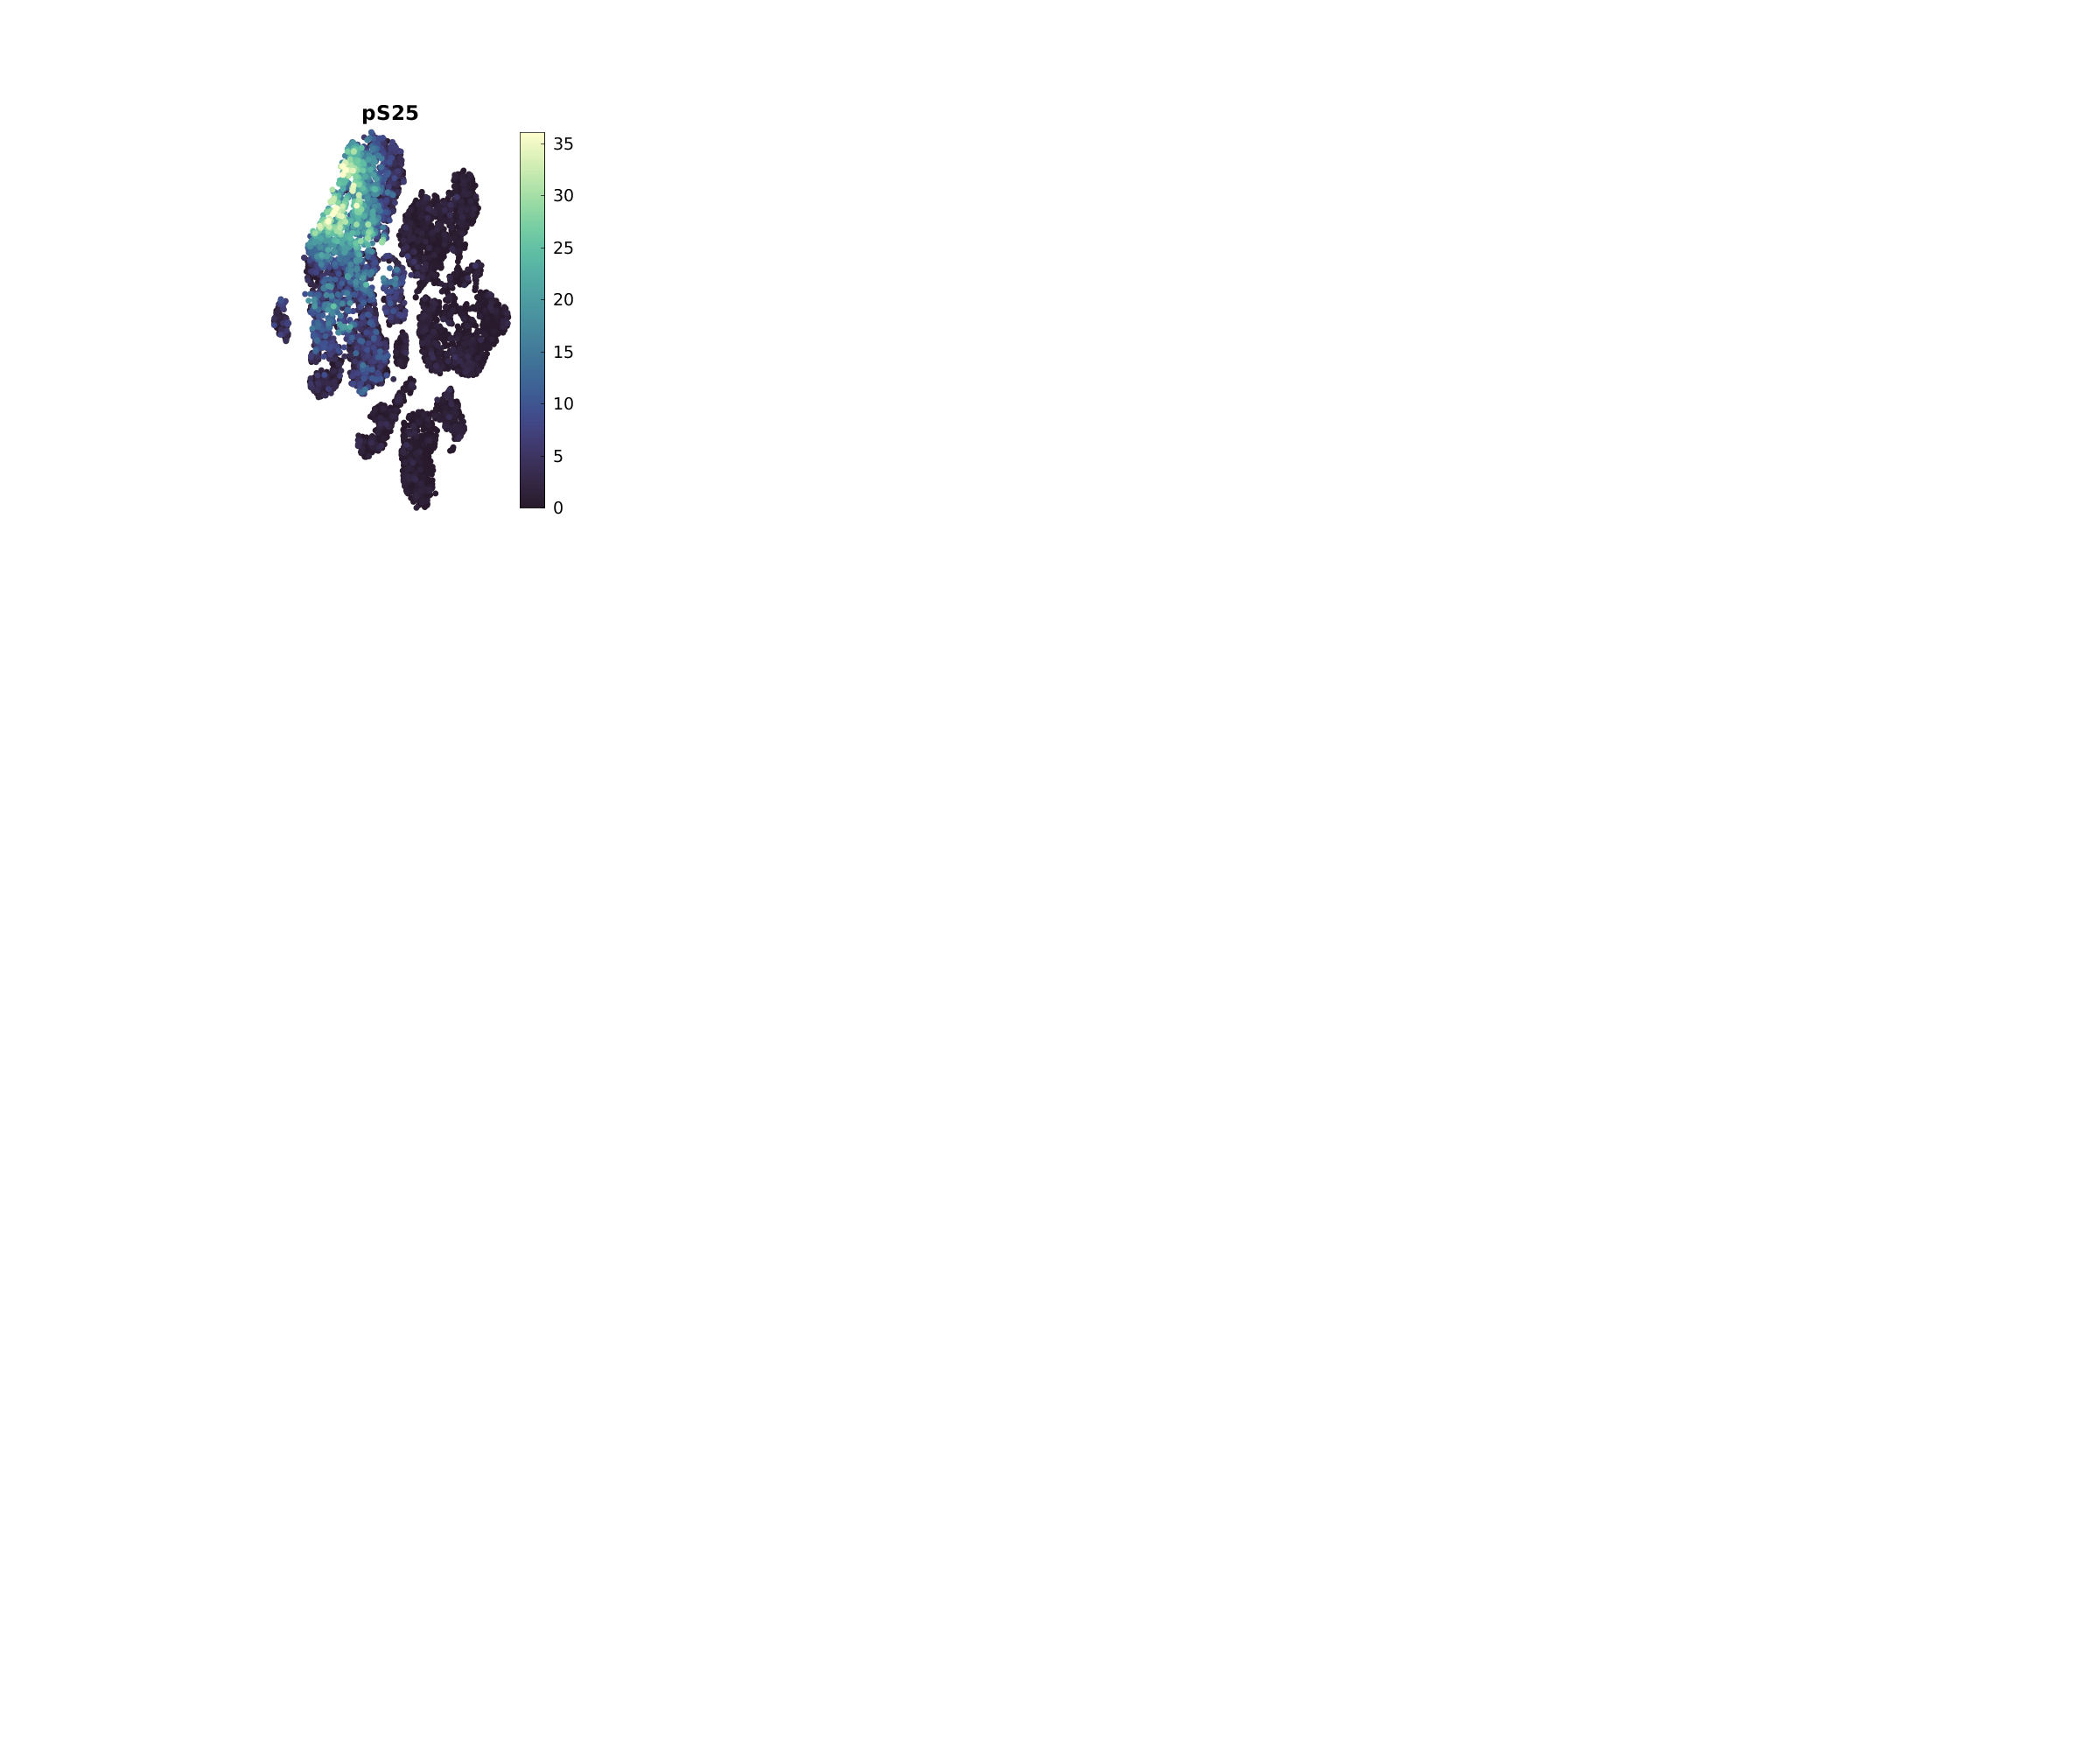

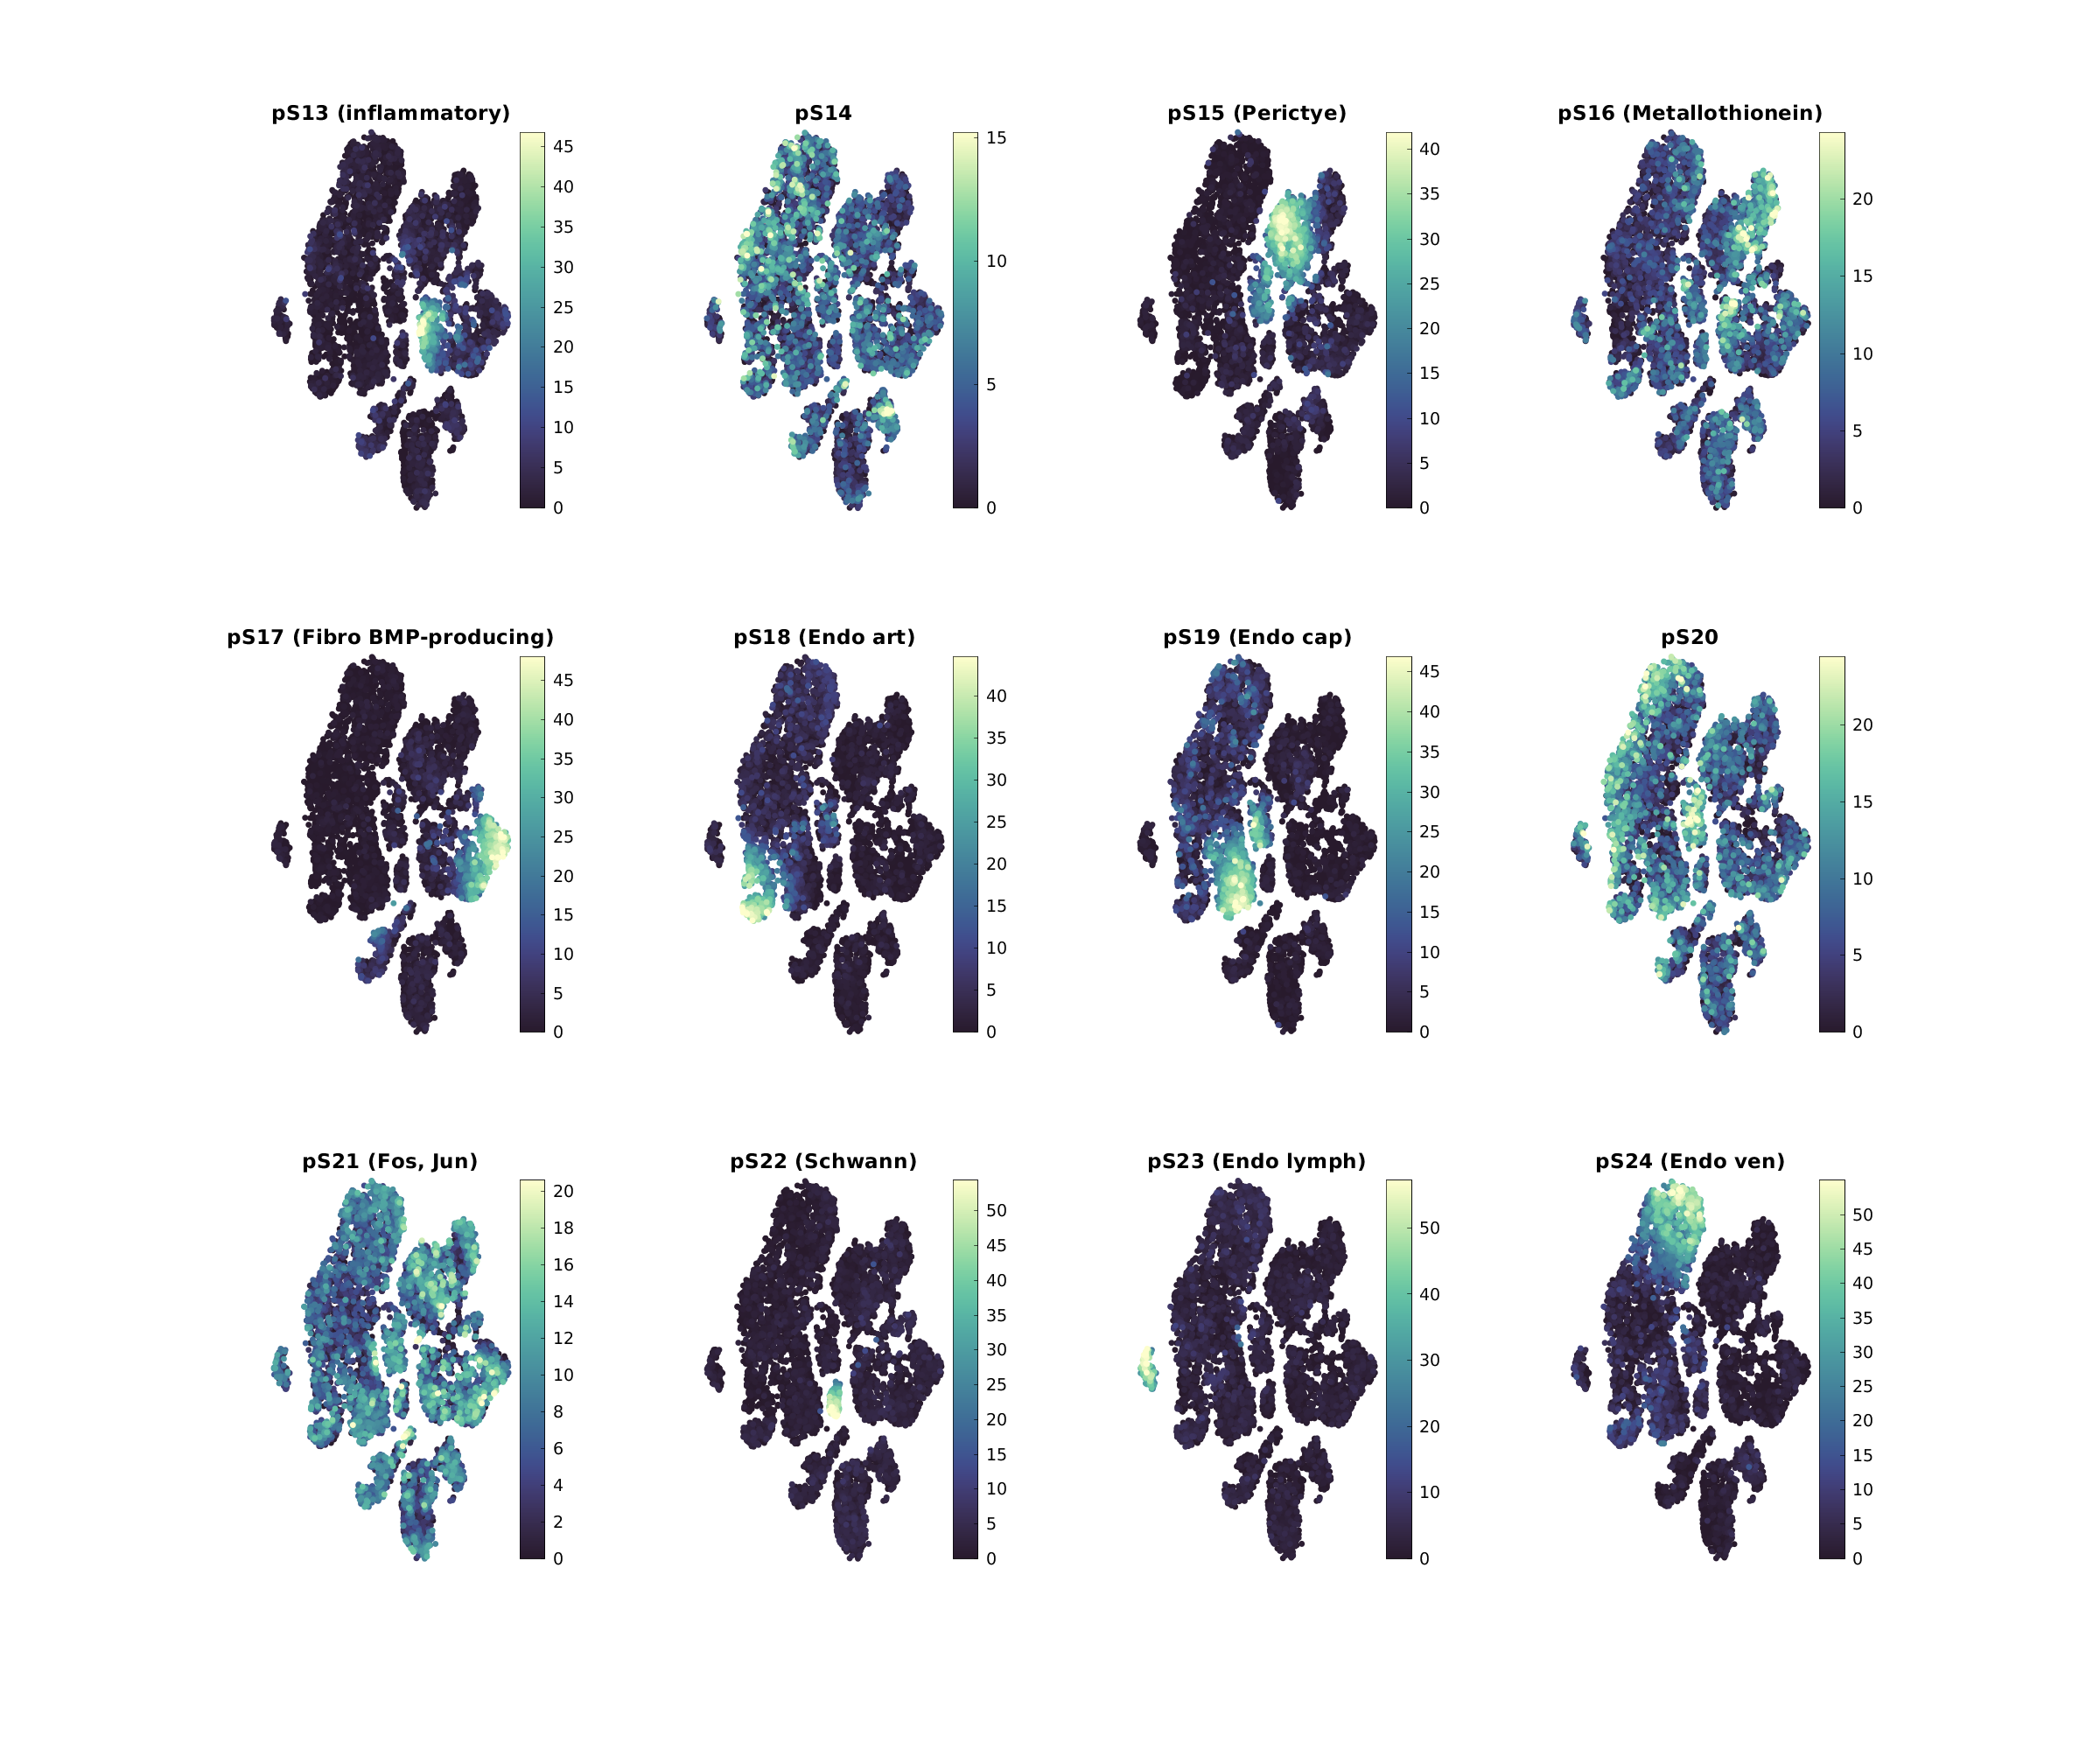

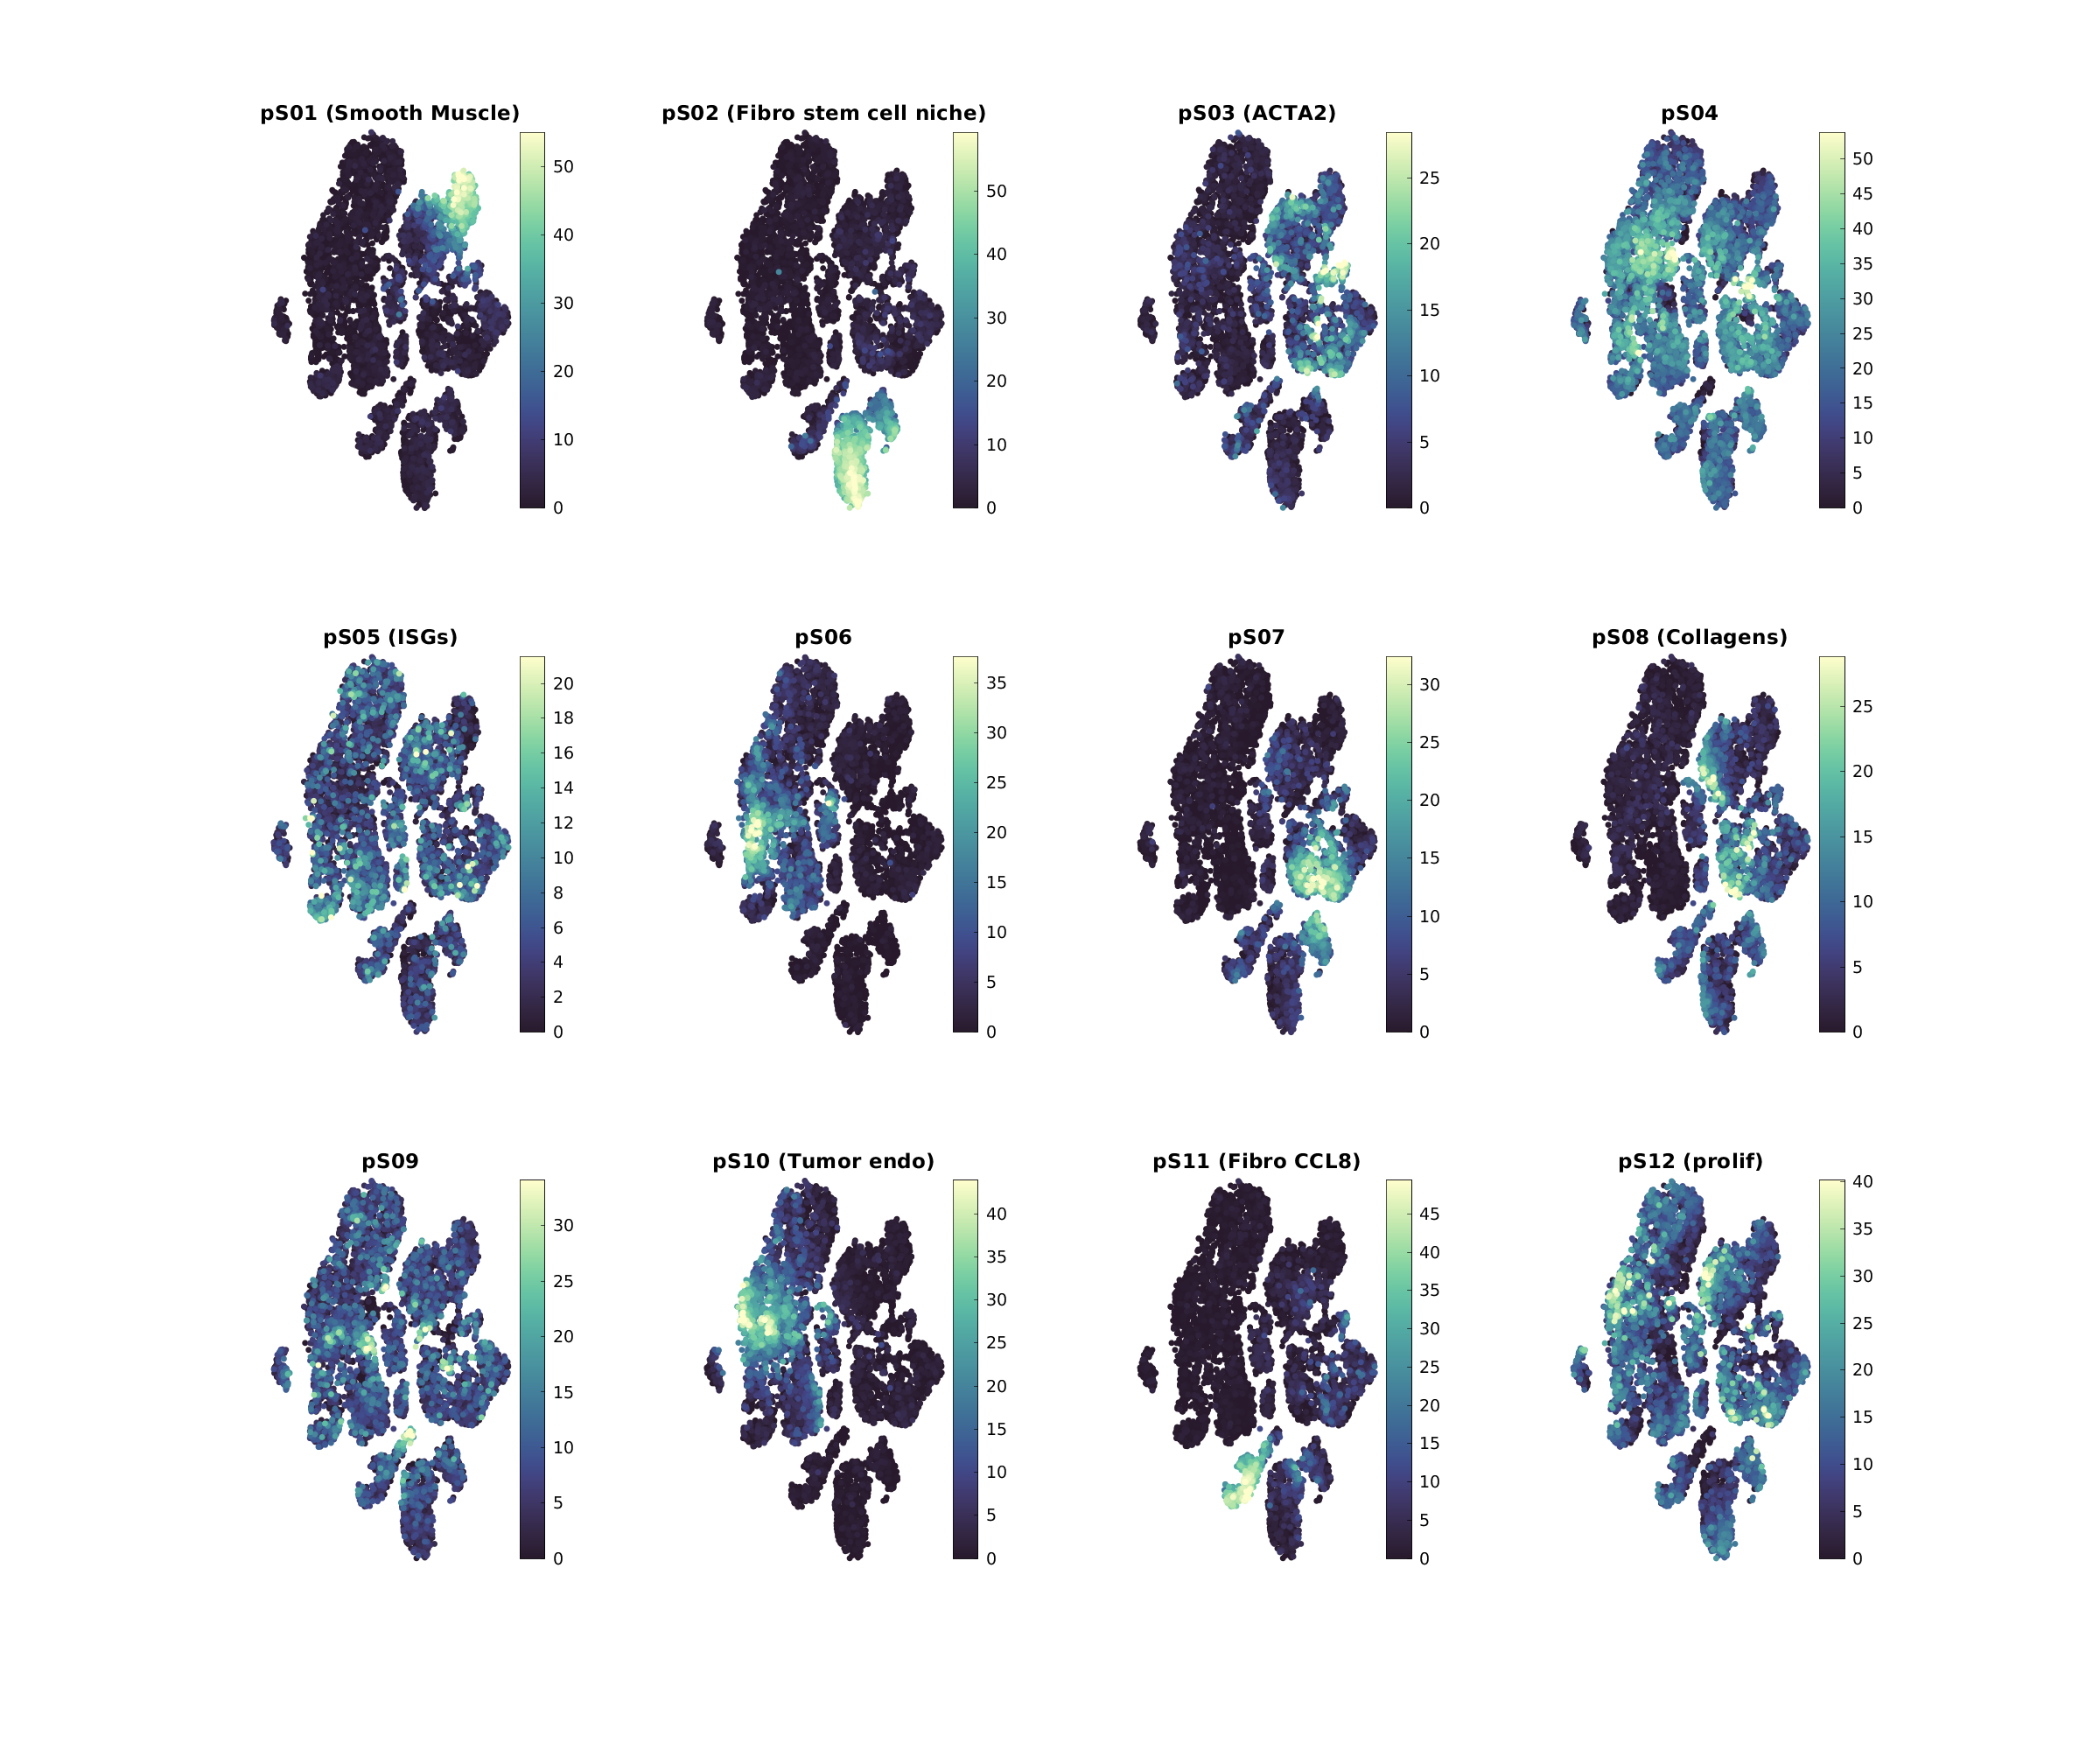

In [68]:
%plot -s 2400,2000

zcf = 'Strom';
zp = 'Strom';

[zia,zib] = comember(colon10x_default.sampleID,tSNE_coord.(zcf).sampleID);

zYdata = tSNE_coord.(zcf).ydata(zib,:);
zHval = ccNMFexpAlt.Hmat.(zp)';

zopts = []
zopts.pSize = 7;
zopts.doAlpha = 0.7;
zopts.qTrimLimNNZ = 0.999;
zopts.titleText = ccNMFexpAlt.wNamesSt.(zp);
zopts.nCol = 4;
zopts.nRow = 3;
zopts.tiledLayout = 0;
zopts.plotSize = [ 1 1 2400 2000 ];
zopts.cmap = flipud(cptcmap('deep'));

zfig = plot_tsne_scatter_multi(zYdata,zHval(zia,:),[],[],zopts);

%% 

zOutPlot = sprintf('%s/tSNE_%s_Hmat_%s',zOutP,zcf,zp);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)

### Figure 3E - Endothelial stromal programs

Done - return

zNtype =

  97x1 cell array

    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRd'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'MMRp'  }
    {'Normal'}
    {'Norma

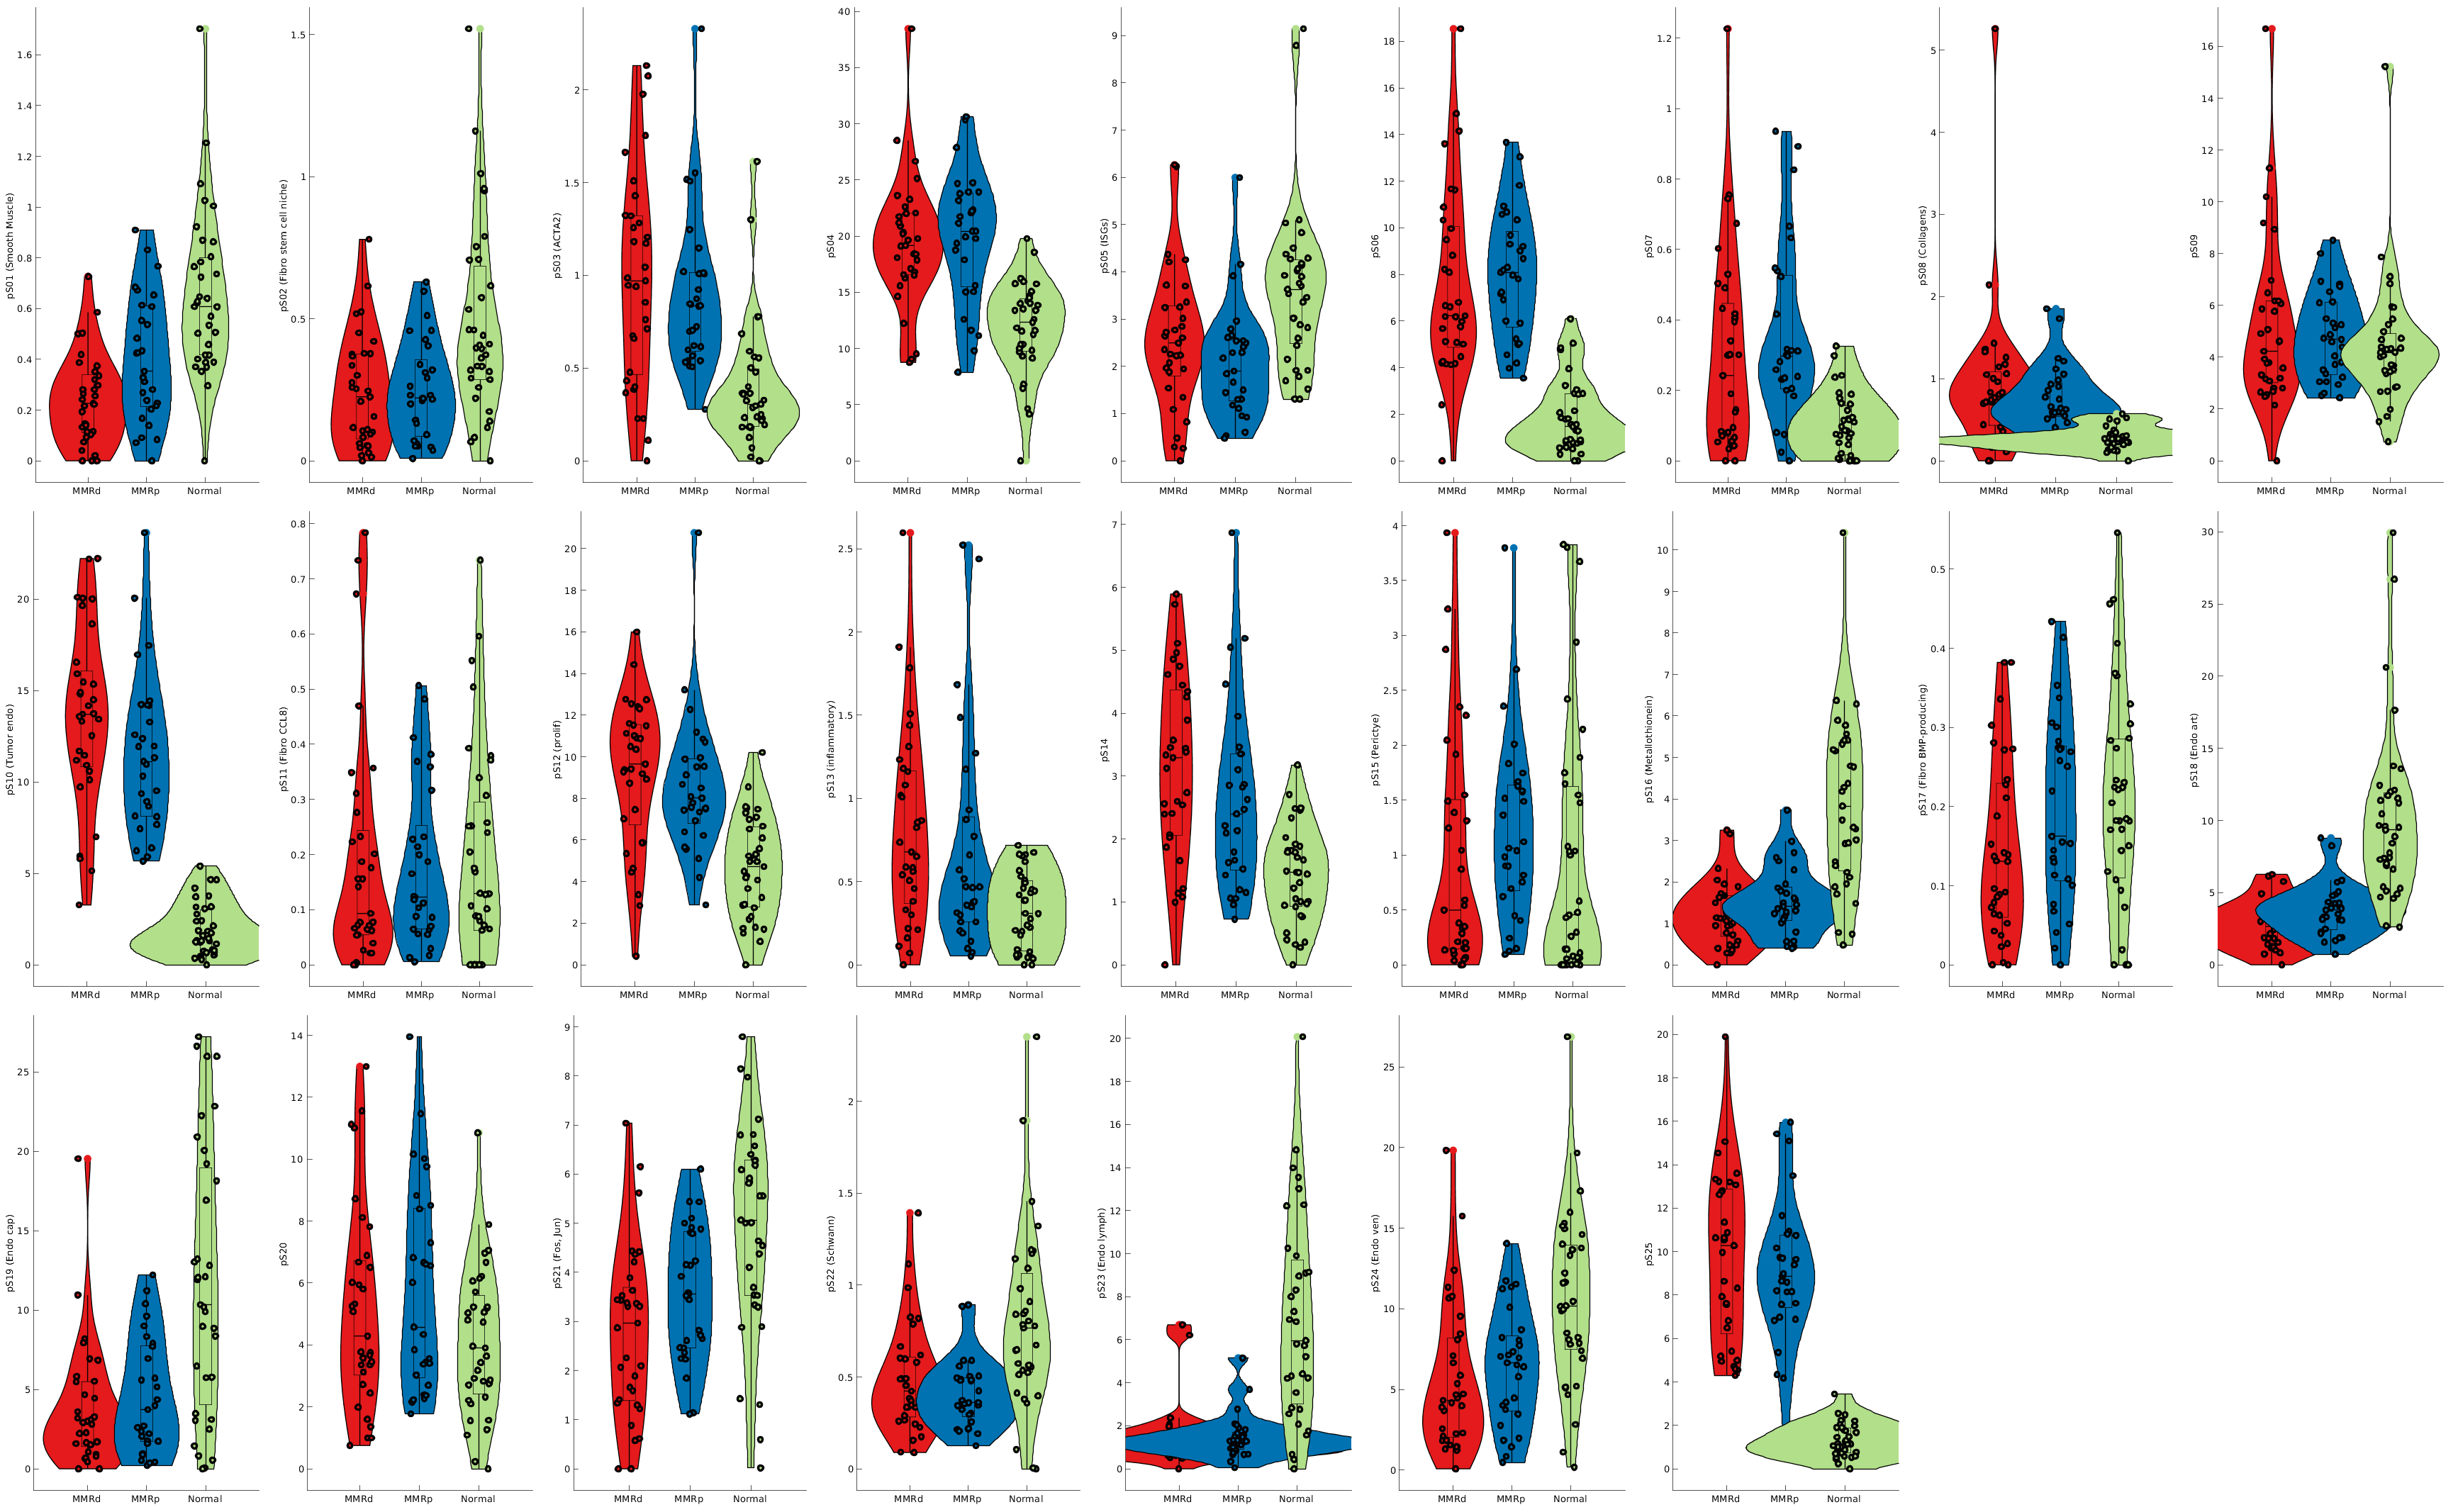

In [69]:
%plot -s 2600,1600

zcf = 'Strom';
zia = strcmp(colon10x_default.annot.clMidway,'Endo');

zCl = colon10x_default.annot.clMidway(zia);
zMMRtype = colon10x_default.metatable.MMRStatusTumor(zia);
zMMRtype = colon10x_default.metatable.MMRStatusTumor(zia);

zHmat = ccNMFexpAlt.Hmat.(zcf)';
zHmat = zHmat(zia,:);

zWnames = ccNMFexpAlt.wNamesSt.(zcf);

% 

zBID = mergeStringPair(colon10x_default.metatable.MMRStatusTumor,colon10x_default.metatable.PatientTypeID);
zBIDsub = zBID(zia);

%

zopts = [];
zopts.aggrFunct = @(X,dim)quantile(X,0.75,dim);
[zHq75,~,zN] = summarize_group(zHmat',zBIDsub);
zHq75 = zHq75';

%

zNtype = regexprep(zN,'_.*','');

% 

zfig = figure('Position',[ 0 0 2600 1600]);

zopts = [];
zopts.widthV = 0.9;
zopts.widthBox = 0.6;
zopts.doJitter = 0.4;
zopts.cmap = colorSet(zColSet.crcTypeC);
clear g 

for zi = 1:9     
    g(1,zi) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(1,zi).stat_violin2('width',zopts.widthV);
    g(1,zi).stat_boxplot('width',zopts.widthBox);
    g(1,zi).geom_jitter('width',zopts.doJitter);
    g(1,zi).set_names('x','','y',zWnames{zi});
end

for zi = 10:18
    zp = zi - 9;
    g(2,zp) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(2,zp).stat_violin2('width',zopts.widthV);
    g(2,zp).stat_boxplot('width',zopts.widthBox);
    g(2,zp).geom_jitter('width',zopts.doJitter);
    g(2,zp).set_names('x','','y',zWnames{zi});
end

for zi = 19:25
    zp = zi - 18;
    g(3,zp) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(3,zp).stat_violin2('width',zopts.widthV);
    g(3,zp).stat_boxplot('width',zopts.widthBox);
    g(3,zp).geom_jitter('width',zopts.doJitter);
    g(3,zp).set_names('x','','y',zWnames{zi});
end

g.set_color_options('map',zopts.cmap,'n_color',size(zopts.cmap,1));
g.set_layout_options('legend',false);

outG = g.draw();

%%

zfig = gcf();
zOutPlot = sprintf('%s/Fig3e_expProgramPidViolin_Endo_MMRsplit',zOutP);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)

## Fibro only


zcf =

    'Strom'

Done - return
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_colo

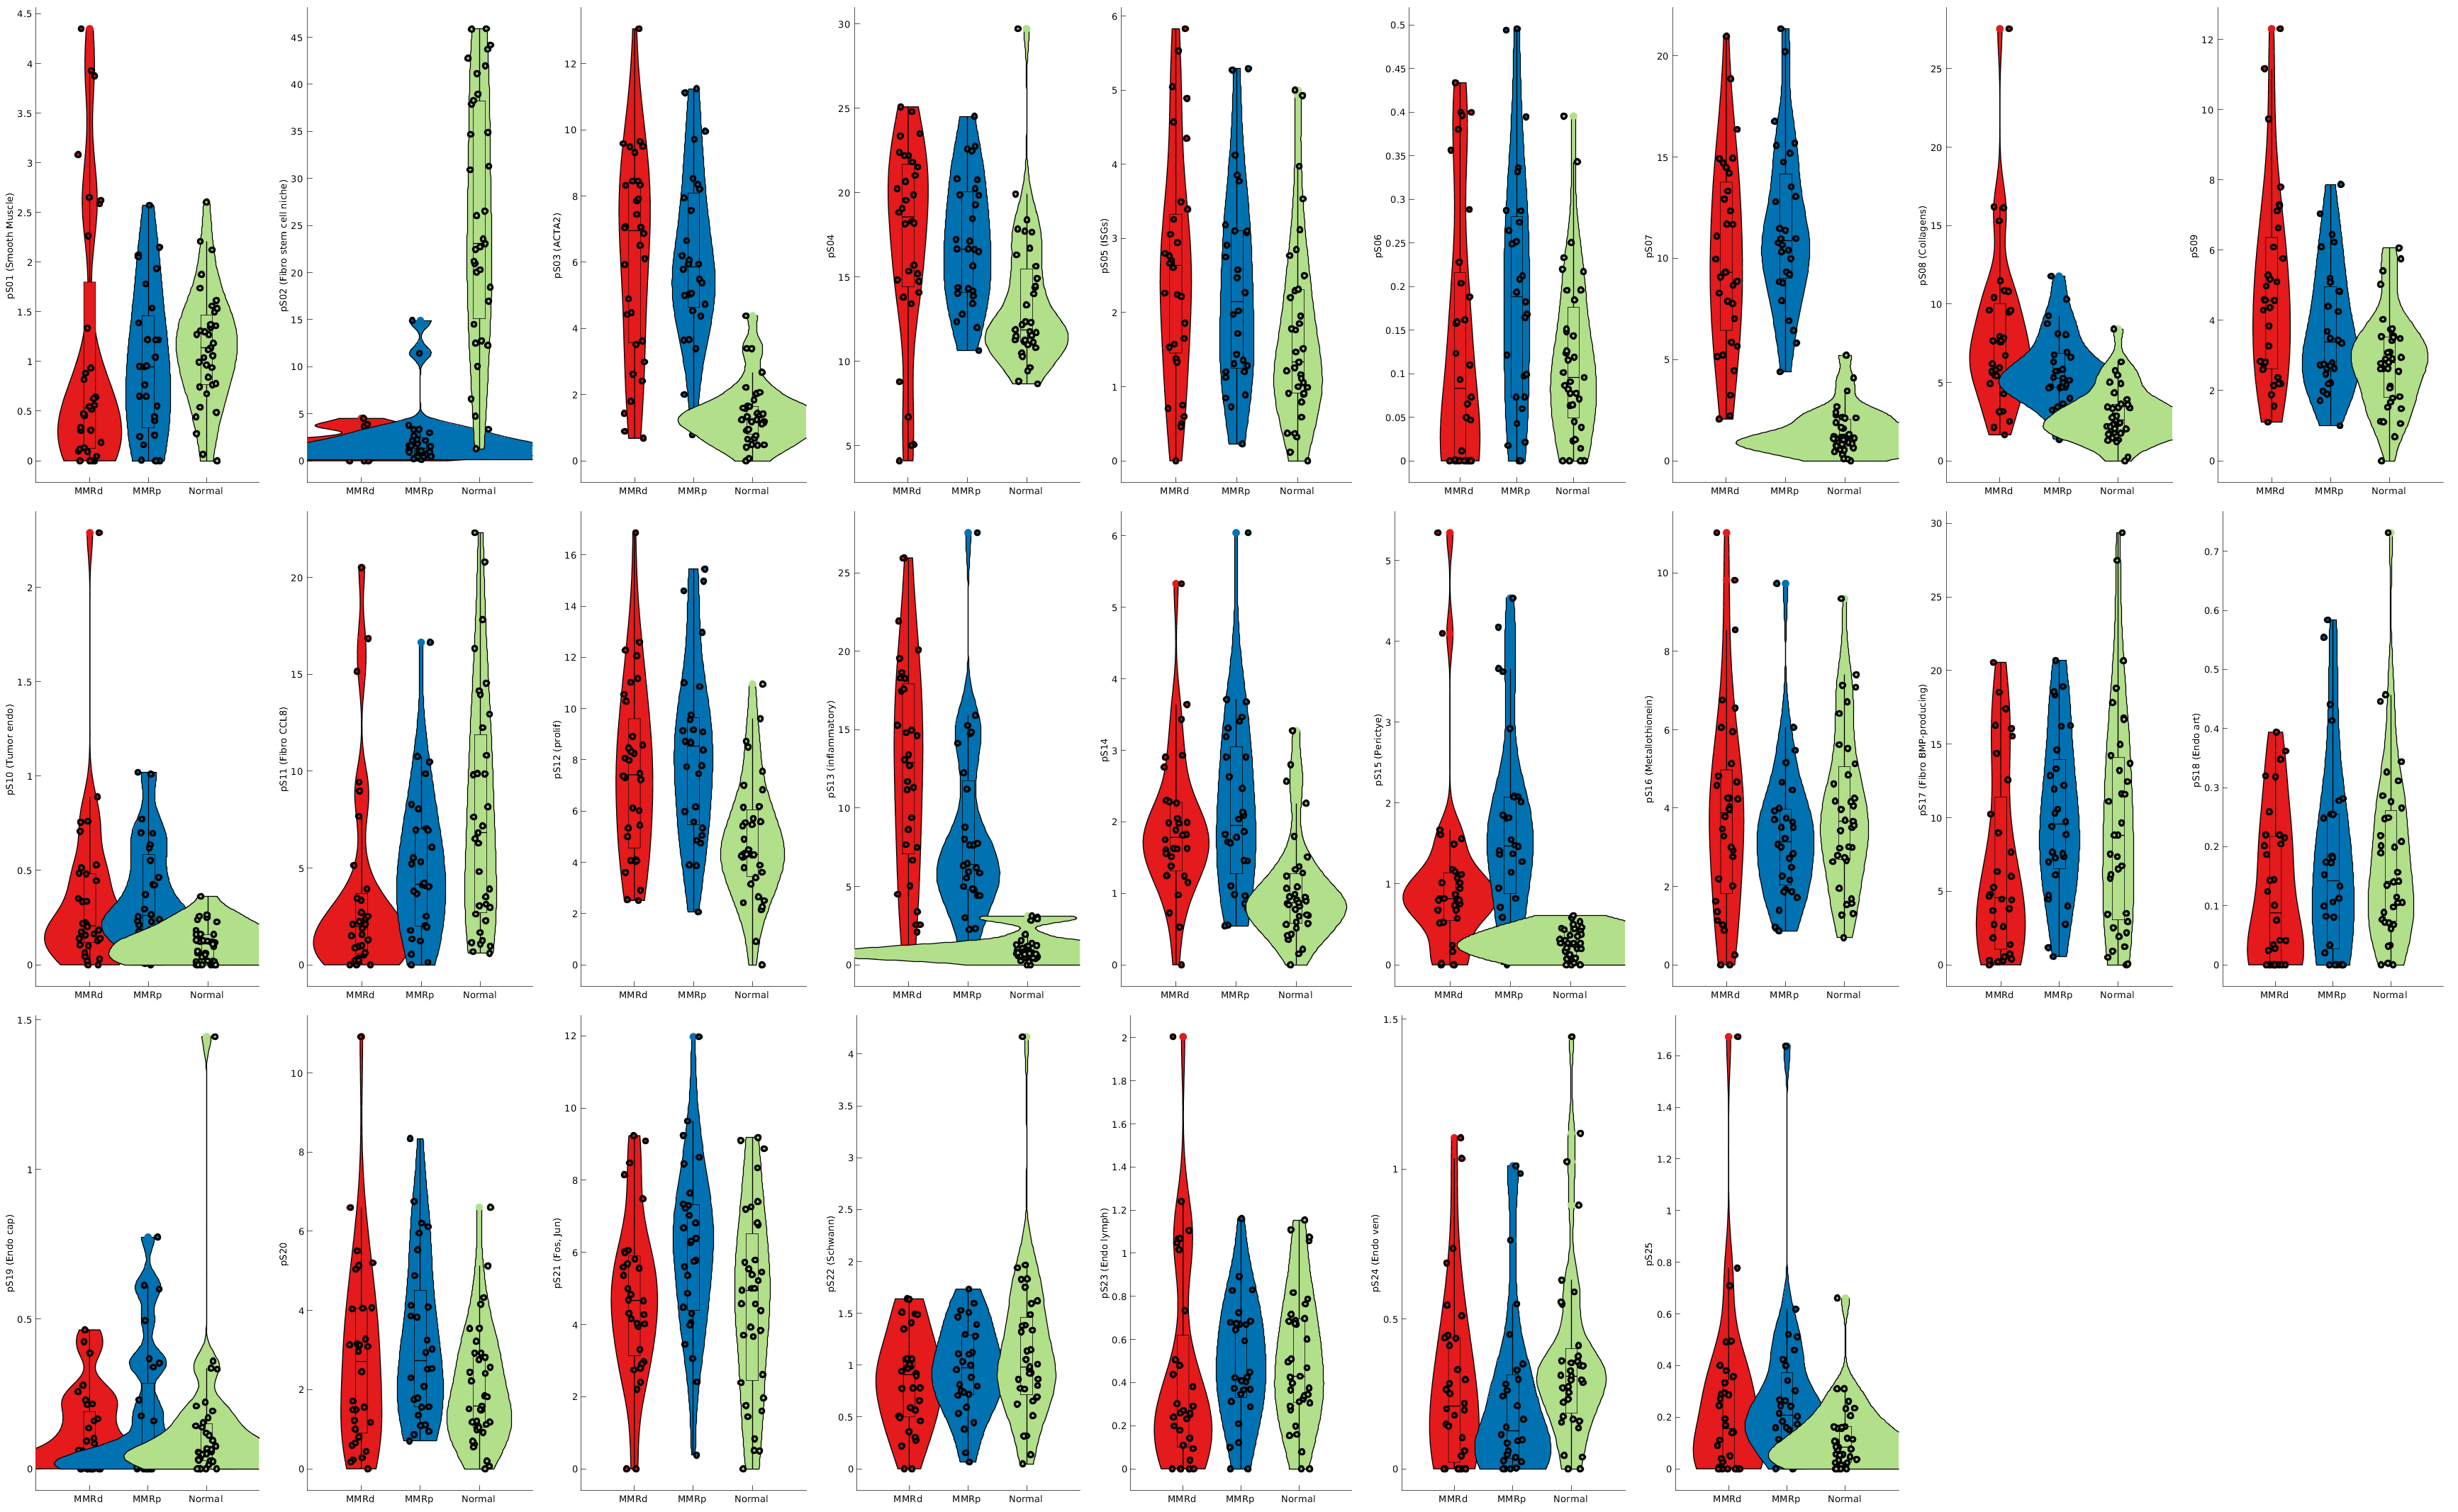

In [72]:
zcf = 'Strom'
zia = strcmp(colon10x_default.annot.clMidway,'Fibro');

zCl = colon10x_default.annot.clMidway(zia);
zMMRtype = colon10x_default.metatable.MMRStatusTumor(zia);
zMMRtype = colon10x_default.metatable.MMRStatusTumor(zia);

zHmat = ccNMFexpAlt.Hmat.(zcf)';
zHmat = zHmat(zia,:);

zWnames = ccNMFexpAlt.wNamesSt.(zcf);

% 

zBID = mergeStringPair(colon10x_default.metatable.MMRStatusTumor,colon10x_default.metatable.PatientTypeID);
zBIDsub = zBID(zia);

%

zopts = [];
zopts.aggrFunct = @(X,dim)quantile(X,0.75,dim);
[zHq75,~,zN] = summarize_group(zHmat',zBIDsub);
zHq75 = zHq75';

%

zNtype = regexprep(zN,'_.*','');

% 

zfig = figure('Position',[ 0 0 2600 1600]);

zopts = [];
zopts.widthV = 0.9;
zopts.widthBox = 0.6;
zopts.doJitter = 0.4;
zopts.cmap = colorSet(zColSet.crcTypeC);
clear g 

for zi = 1:9 
    
    g(1,zi) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(1,zi).stat_violin2('width',zopts.widthV);
    g(1,zi).stat_boxplot('width',zopts.widthBox);
    g(1,zi).geom_jitter('width',zopts.doJitter);
    g(1,zi).set_names('x','','y',zWnames{zi});
end

for zi = 10:18
    zp = zi - 9;
    g(2,zp) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(2,zp).stat_violin2('width',zopts.widthV);
    g(2,zp).stat_boxplot('width',zopts.widthBox);
    g(2,zp).geom_jitter('width',zopts.doJitter);
    g(2,zp).set_names('x','','y',zWnames{zi});
end

for zi = 19:25
    zp = zi - 18;
    g(3,zp) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(3,zp).stat_violin2('width',zopts.widthV);
    g(3,zp).stat_boxplot('width',zopts.widthBox);
    g(3,zp).geom_jitter('width',zopts.doJitter);
    g(3,zp).set_names('x','','y',zWnames{zi});
end

g.set_color_options('map',zopts.cmap,'n_color',size(zopts.cmap,1));
g.set_layout_options('legend',false);

outG = g.draw();

%%

zfig = gcf();
zOutPlot = sprintf('%s/Fig3g_expProgramPidViolin_Fibro_MMRsplit',zOutP);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)

### Perictyes only 


zWnames =

  25x1 cell array

    {'pS01 (Smooth Muscle)'        }
    {'pS02 (Fibro stem cell niche)'}
    {'pS03 (ACTA2)'                }
    {'pS04'                        }
    {'pS05 (ISGs)'                 }
    {'pS06'                        }
    {'pS07'                        }
    {'pS08 (Collagens)'            }
    {'pS09'                        }
    {'pS10 (Tumor endo)'           }
    {'pS11 (Fibro CCL8)'           }
    {'pS12 (prolif)'               }
    {'pS13 (inflammatory)'         }
    {'pS14'                        }
    {'pS15 (Perictye)'             }
    {'pS16 (Metallothionein)'      }
    {'pS17 (Fibro BMP-producing)'  }
    {'pS18 (Endo art)'             }
    {'pS19 (Endo cap)'             }
    {'pS20'                        }
    {'pS21 (Fos, Jun)'             }
    {'pS22 (Schwann)'              }
    {'pS23 (Endo lymph)'           }
    {'pS24 (Endo ven)'             }
    {'pS25'                        }

Done - return
Custom colormap without n_col

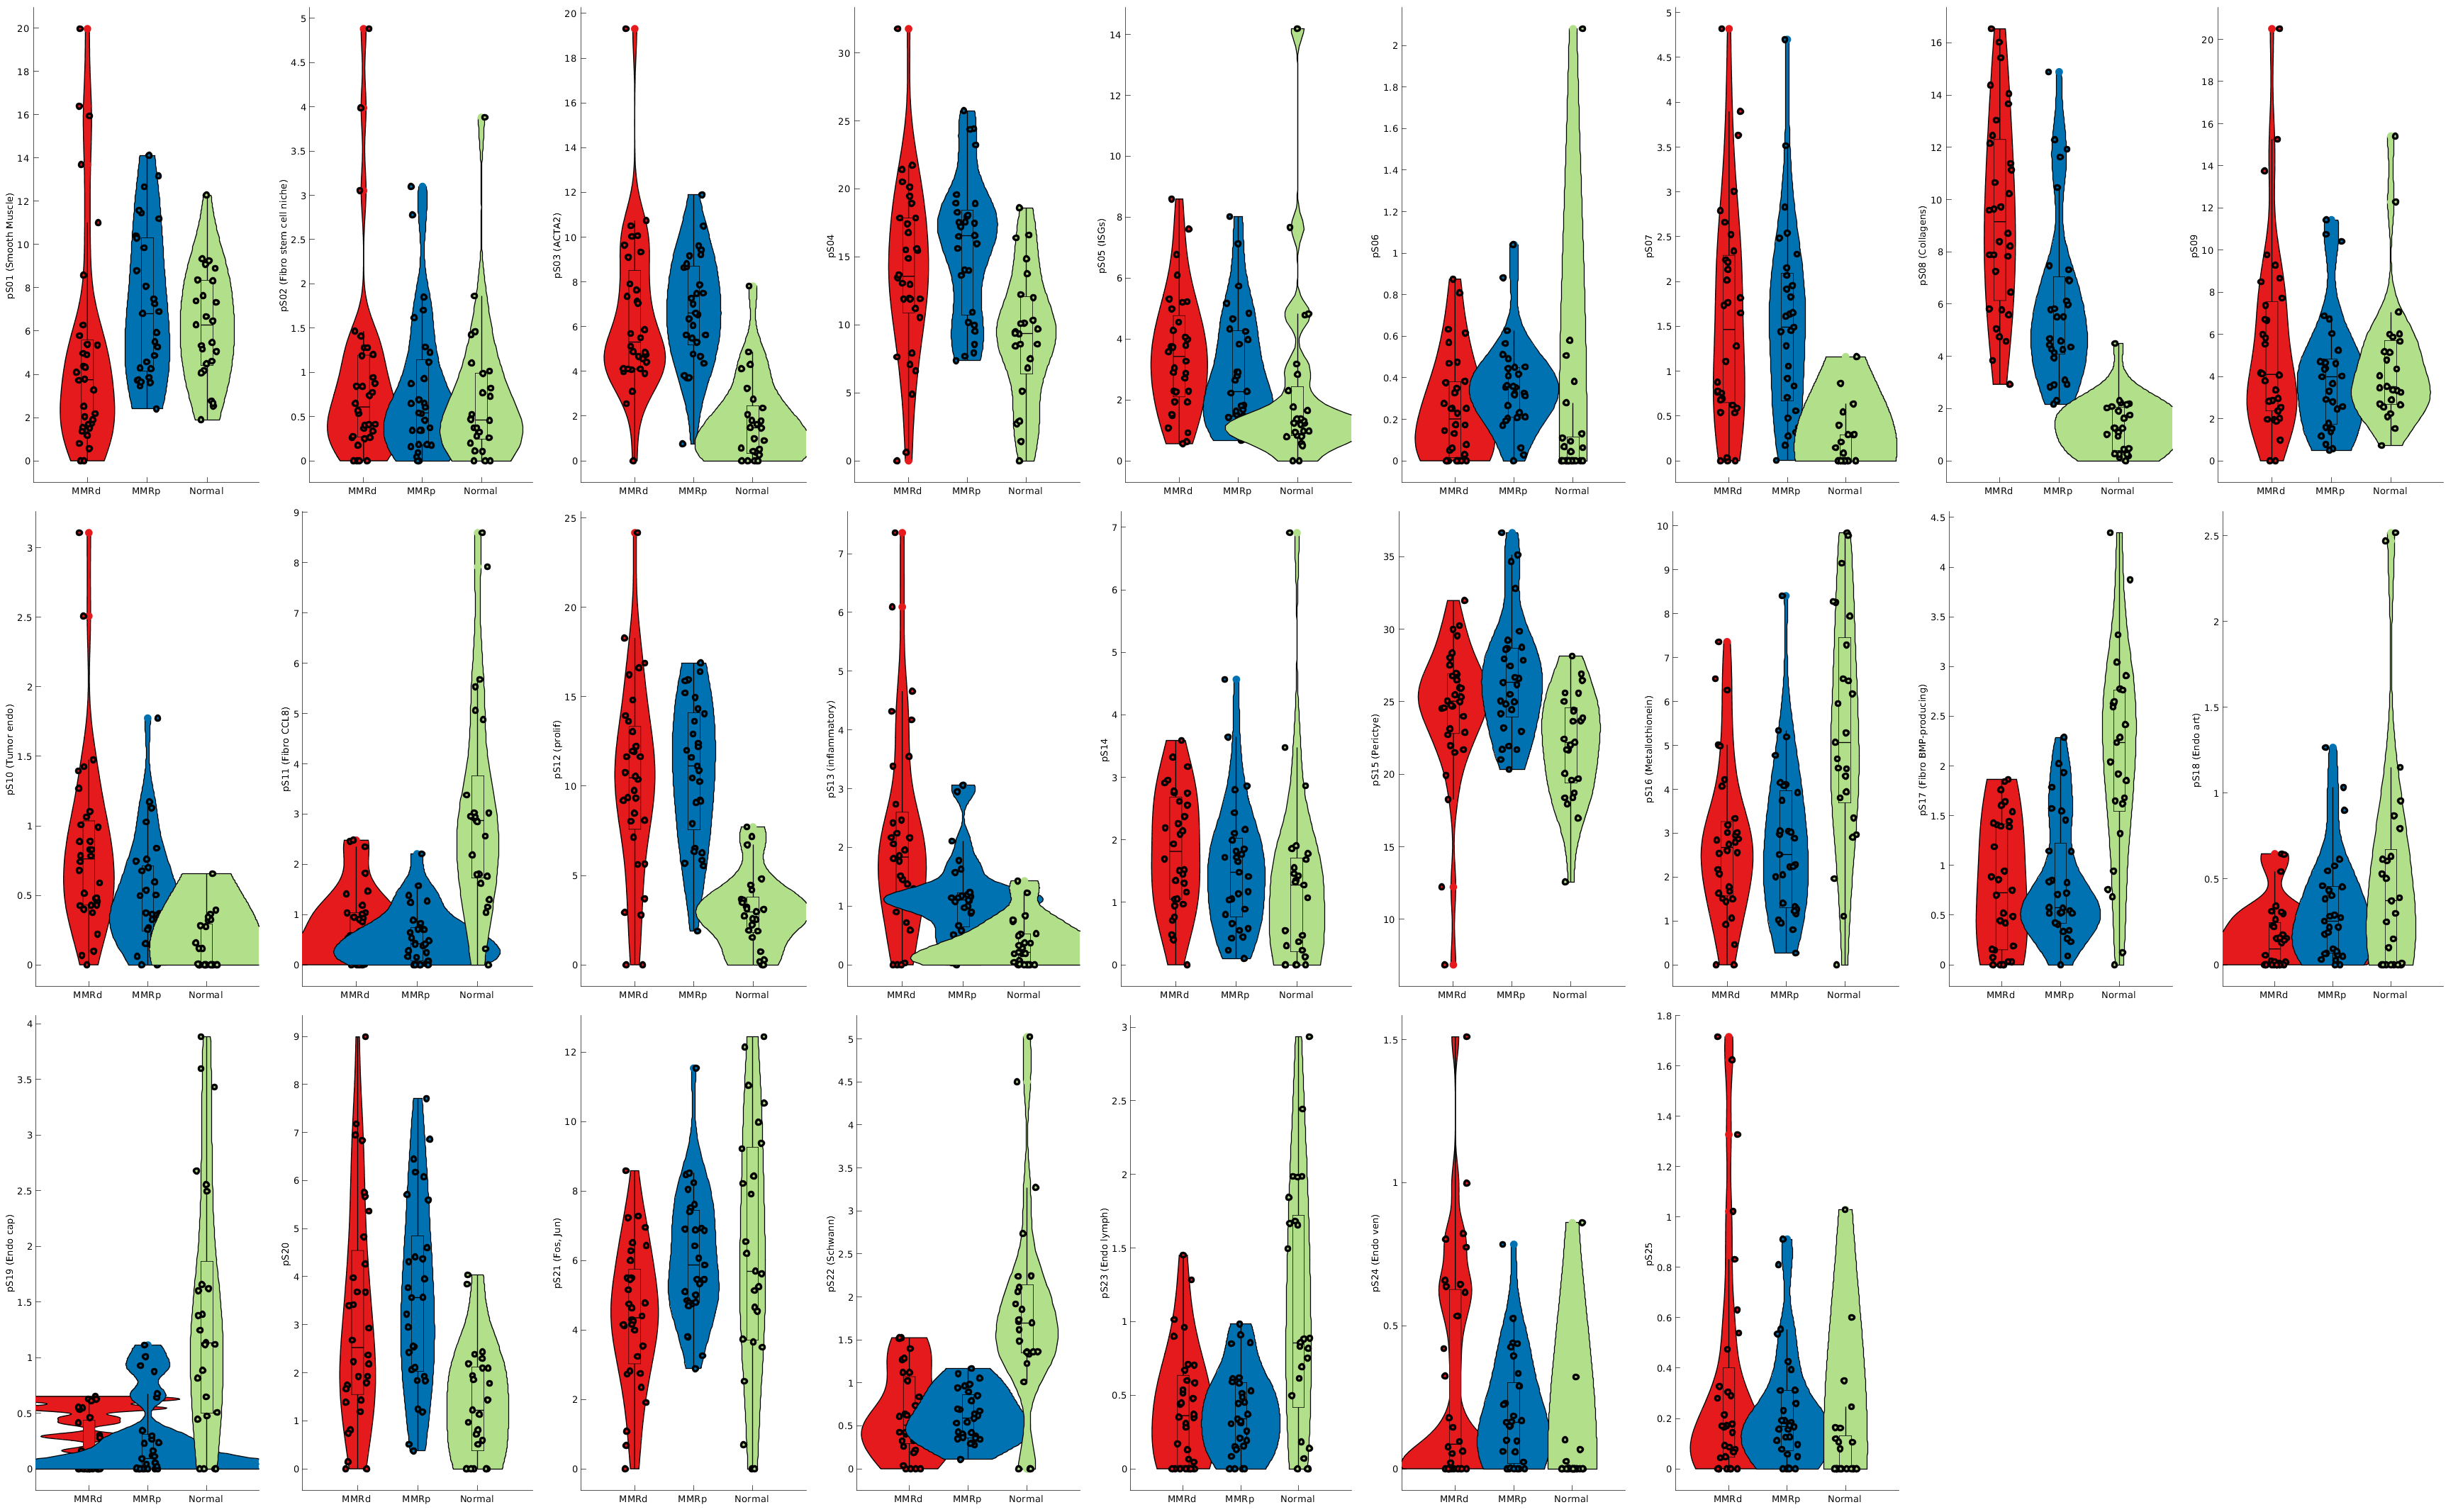

In [74]:
zcf = 'Strom';
zia = strcmp(colon10x_default.annot.clMidway,'Peri');

zCl = colon10x_default.annot.clMidway(zia);
zMMRtype = colon10x_default.metatable.MMRStatusTumor(zia);
zMMRtype = colon10x_default.metatable.MMRStatusTumor(zia);

zHmat = ccNMFexpAlt.Hmat.(zcf)';
zHmat = zHmat(zia,:);

zWnames = ccNMFexpAlt.wNamesSt.(zcf)

% 

zBID = mergeStringPair(colon10x_default.metatable.MMRStatusTumor,colon10x_default.metatable.PatientTypeID);
zBIDsub = zBID(zia);

%

zopts = [];
zopts.aggrFunct = @(X,dim)quantile(X,0.75,dim);
[zHq75,~,zN] = summarize_group(zHmat',zBIDsub);
zHq75 = zHq75';

%

zNtype = regexprep(zN,'_.*','');

% 

zfig = figure('Position',[ 0 0 2600 1600]);

zopts = [];
zopts.widthV = 0.9;
zopts.widthBox = 0.6;
zopts.doJitter = 0.4;
zopts.cmap = colorSet(zColSet.crcTypeC);
clear g 

for zi = 1:9 
    
    g(1,zi) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(1,zi).stat_violin2('width',zopts.widthV);
    g(1,zi).stat_boxplot('width',zopts.widthBox);
    g(1,zi).geom_jitter('width',zopts.doJitter);
    g(1,zi).set_names('x','','y',zWnames{zi});
end

for zi = 10:18
    zp = zi - 9;
    g(2,zp) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(2,zp).stat_violin2('width',zopts.widthV);
    g(2,zp).stat_boxplot('width',zopts.widthBox);
    g(2,zp).geom_jitter('width',zopts.doJitter);
    g(2,zp).set_names('x','','y',zWnames{zi});
end

for zi = 19:25
    zp = zi - 18;
    g(3,zp) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(3,zp).stat_violin2('width',zopts.widthV);
    g(3,zp).stat_boxplot('width',zopts.widthBox);
    g(3,zp).geom_jitter('width',zopts.doJitter);
    g(3,zp).set_names('x','','y',zWnames{zi});
end

g.set_color_options('map',zopts.cmap,'n_color',size(zopts.cmap,1));
g.set_layout_options('legend',false);

outG = g.draw();

%%

zfig = gcf();
zOutPlot = sprintf('%s/Fig3g_expProgramPidViolin_Peri_MMRsplit',zOutP);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);

In [ ]:
%% Figure3 H -- Dot plot